In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from autots import AutoTS
import pathlib
import json

In [2]:
well_data = pd.read_excel('../../data/Gelman_2020_DATA_Rockworks6-2020.xlsx',
                          sheet_name = 'TmInterval')
well_data.head(10)

,Bore,Name,Depth1,Depth2,SampleDate,Value,Comment
0,1021 Westview Way,1-4 Dioxane,260.0,268.0,2019-05-08,0.5,EGLE Lab
1,1024 Westview Way,1-4 Dioxane,-9999.0,-9999.0,2019-05-08,0.5,EGLE Lab
2,1049 Westview Way,1-4 Dioxane,272.0,280.0,2019-05-08,0.5,EGLE Lab
3,105 Myrtle,1-4 Dioxane,61.0,65.0,1999-03-27,0.5,NaN
4,105 Myrtle,1-4 Dioxane,61.0,65.0,1999-05-28,0.5,NaN
5,105 Myrtle,1-4 Dioxane,61.0,65.0,1999-08-19,0.5,NaN
6,105 Myrtle,1-4 Dioxane,61.0,65.0,1999-11-16,0.5,NaN
7,105 Myrtle,1-4 Dioxane,61.0,65.0,2000-02-21,0.5,NaN
8,105 Myrtle,1-4 Dioxane,61.0,65.0,2000-08-21,0.5,NaN
9,105 Myrtle,1-4 Dioxane,61.0,65.0,2014-06-18,0.5,NaN


In [3]:
well_data.loc[:, 'y']= pd.to_numeric(well_data['Value'])
well_data.loc[:, 'ds']= pd.to_datetime(well_data['SampleDate'])
well_data

,Bore,Name,Depth1,Depth2,SampleDate,Value,Comment,y,ds
0,1021 Westview Way,1-4 Dioxane,260.0,268.0,2019-05-08,0.5,EGLE Lab,0.5,2019-05-08
1,1024 Westview Way,1-4 Dioxane,-9999.0,-9999.0,2019-05-08,0.5,EGLE Lab,0.5,2019-05-08
2,1049 Westview Way,1-4 Dioxane,272.0,280.0,2019-05-08,0.5,EGLE Lab,0.5,2019-05-08
3,105 Myrtle,1-4 Dioxane,61.0,65.0,1999-03-27,0.5,NaN,0.5,1999-03-27
4,105 Myrtle,1-4 Dioxane,61.0,65.0,1999-05-28,0.5,NaN,0.5,1999-05-28
...,...,...,...,...,...,...,...,...,...
24857,Weber's Drain 1st Sister Lake,1-4 Dioxane,-9999.0,-9999.0,2006-06-20,249.0,NaN,249.0,2006-06-20
24858,Weber's Drain 1st Sister Lake,1-4 Dioxane,-9999.0,-9999.0,2006-06-26,230.0,NaN,230.0,2006-06-26
24859,Weber's Drain 1st Sister Lake,1-4 Dioxane,-9999.0,-9999.0,2006-08-25,0.5,NaN,0.5,2006-08-25
24860,Weber's Heat Pump Drain,1-4 Dioxane,-9999.0,-9999.0,2006-06-20,272.0,NaN,272.0,2006-06-20


In [4]:
def is_json(json_str):
    try:
        json_object = json.loads(json_str)
    except ValueError as e:
        return False
    return True

def format_model(model_str):
    strs = model_str.split('\n')
    print('strs = ', strs)
    res_str = ''
    for s in strs:
        s = s.replace("\"{", "{")
        s = s.replace("}\"", "}")
        s = s.replace("\\", "")
        if is_json(s):
            res_str += json.dumps(json.loads(s), indent=2) + '\n'
        else:
            res_str += s + '\n'
    return res_str

skip1021 Westview Way :length is less than 20.
skip1024 Westview Way :length is less than 20.
skip1049 Westview Way :length is less than 20.
skip105 Myrtle :length is less than 20.
skip1052 Westview Way :length is less than 20.
skip1080 Westview Way :length is less than 20.
SinTrend failed with ValueError('array must not contain infs or NaNs')
SinTrend failed with ValueError('array must not contain infs or NaNs')
SinTrend failed with ValueError('array must not contain infs or NaNs')
SinTrend failed with ValueError('array must not contain infs or NaNs')
SinTrend failed with ValueError('array must not contain infs or NaNs')
SinTrend failed with ValueError('array must not contain infs or NaNs')
SinTrend failed with ValueError('array must not contain infs or NaNs')
SinTrend failed with ValueError('array must not contain infs or NaNs')
SinTrend failed with ValueError('array must not contain infs or NaNs')
SinTrend failed with ValueError('array must not contain infs or NaNs')
SinTrend failed

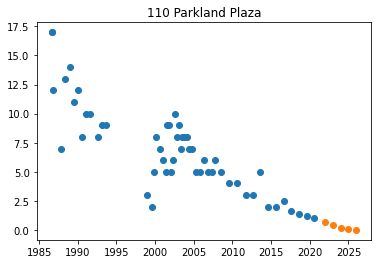

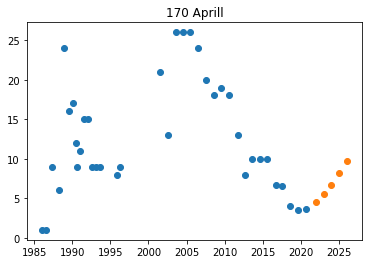

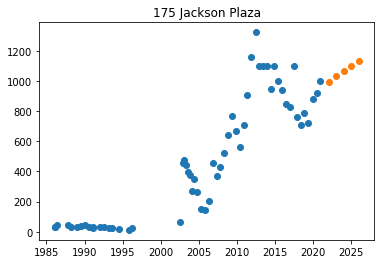

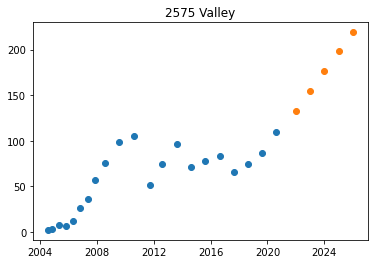

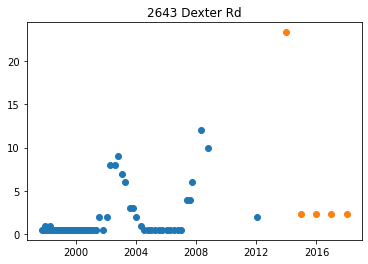

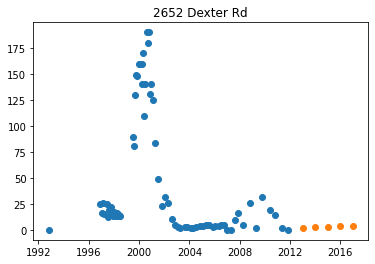

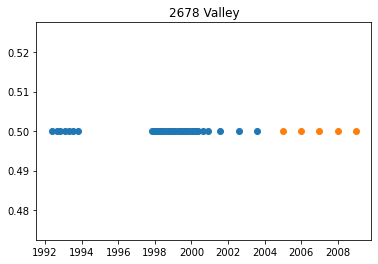

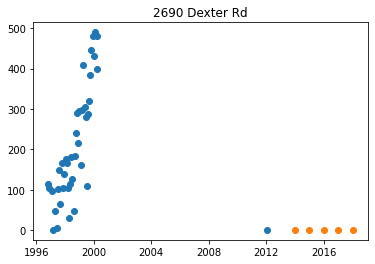

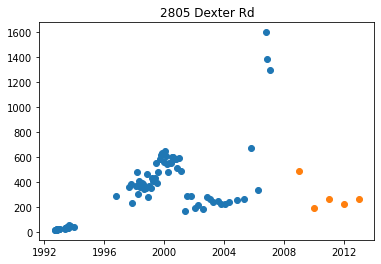

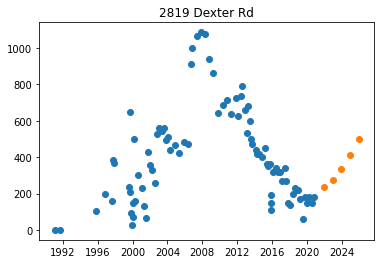

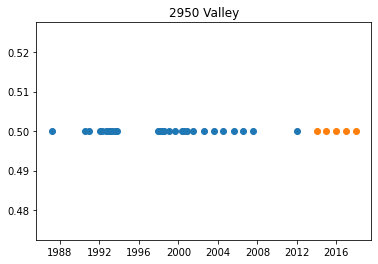

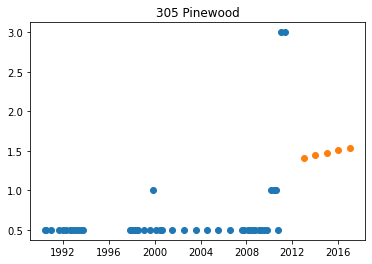

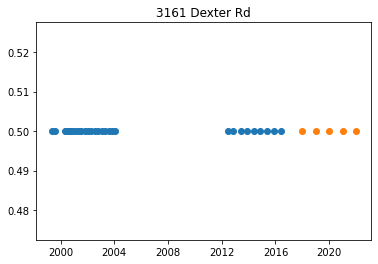

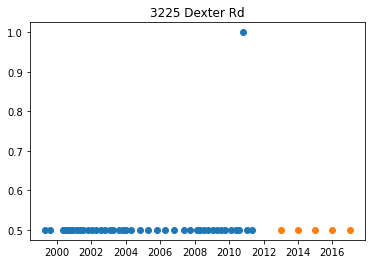

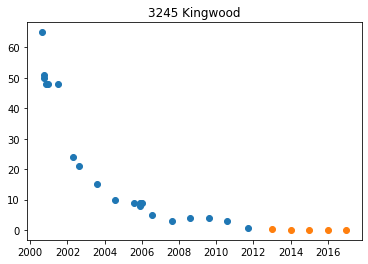

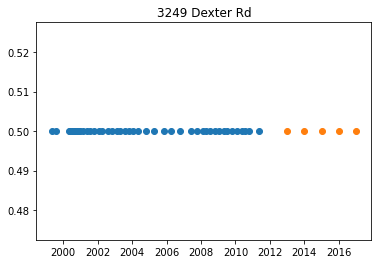

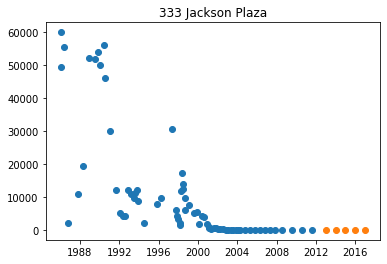

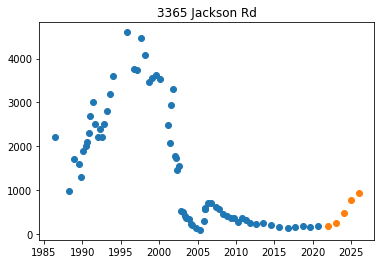

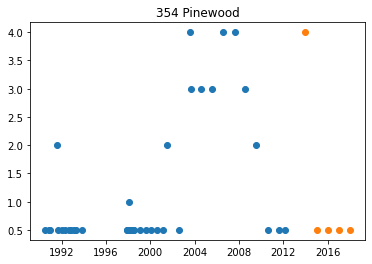

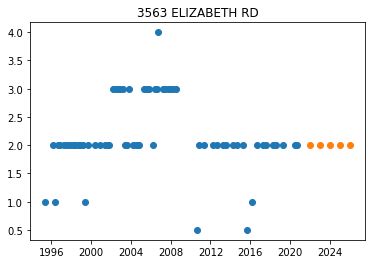

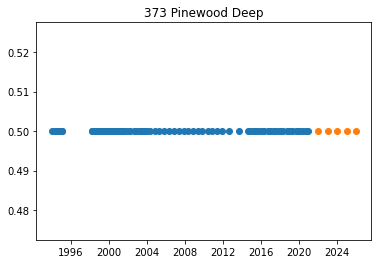

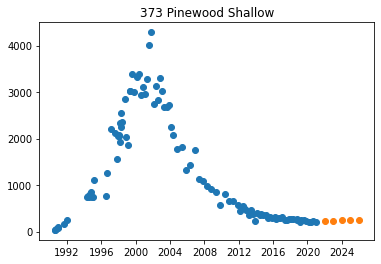

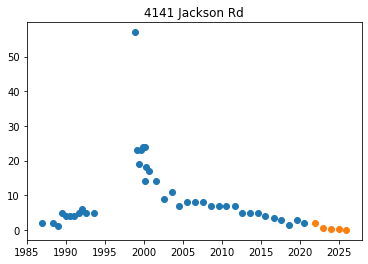

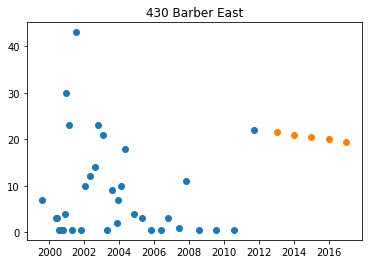

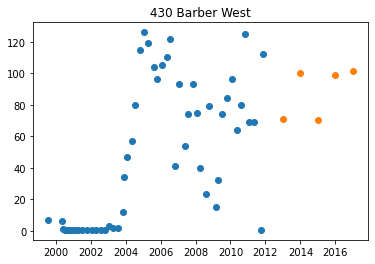

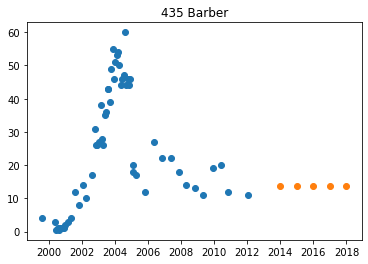

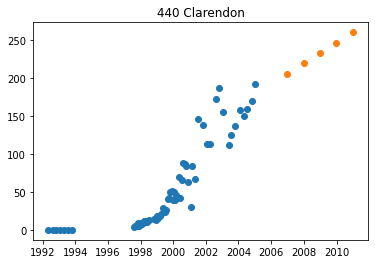

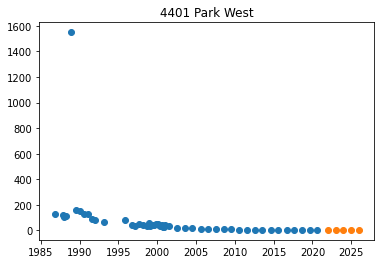

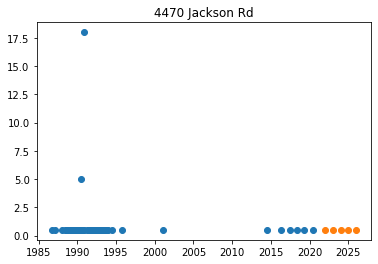

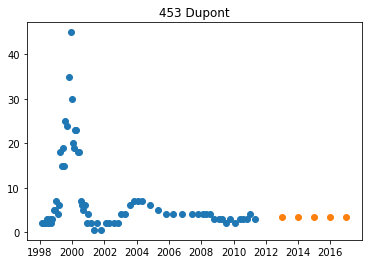

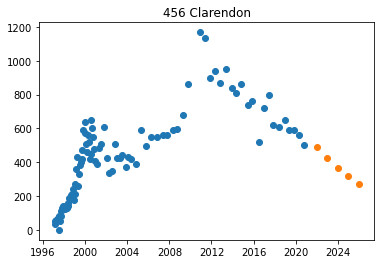

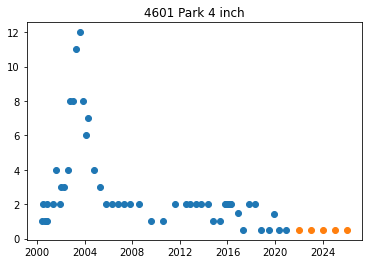

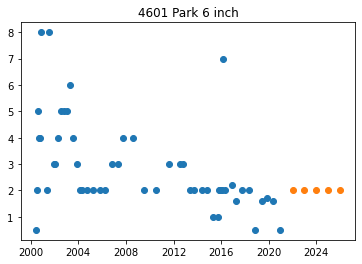

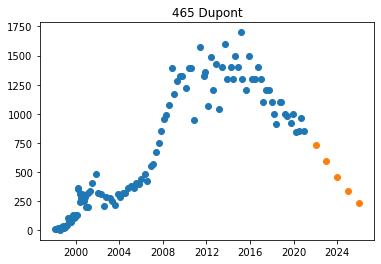

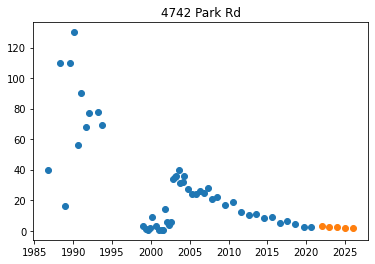

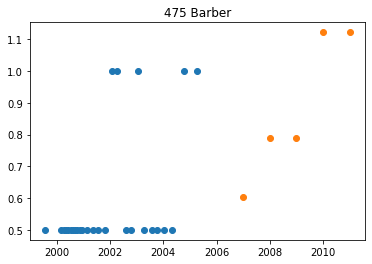

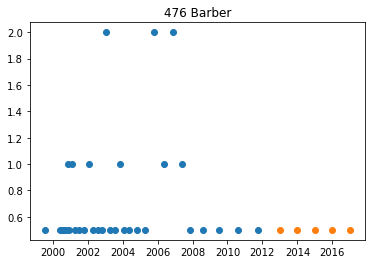

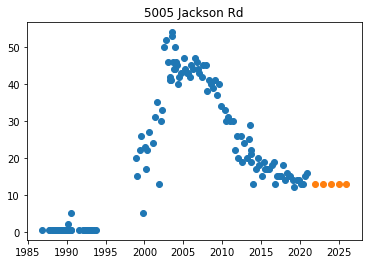

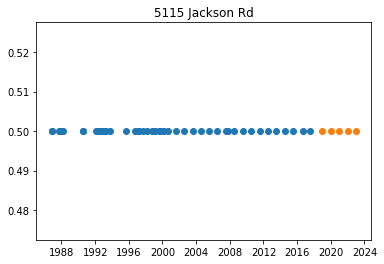

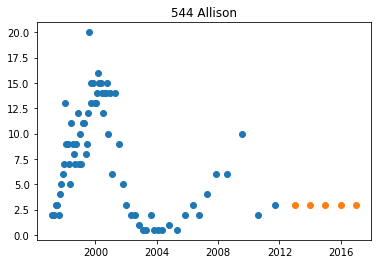

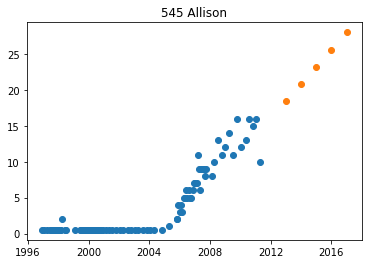

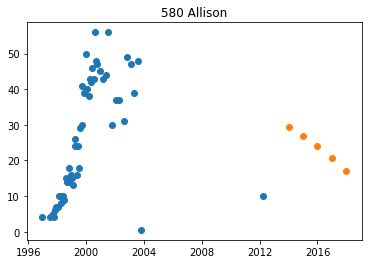

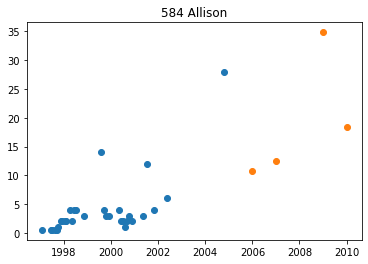

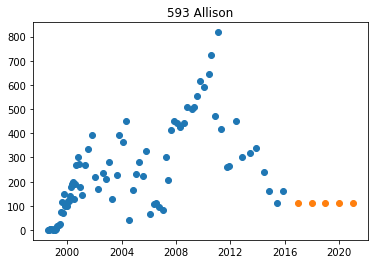

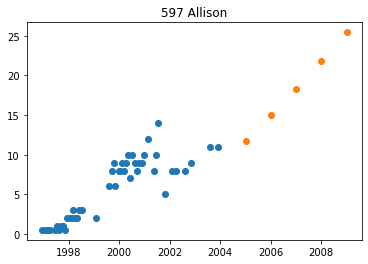

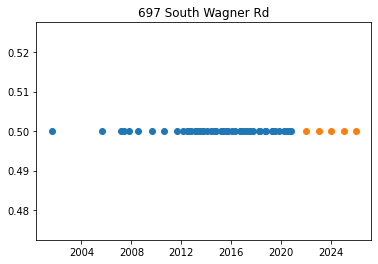

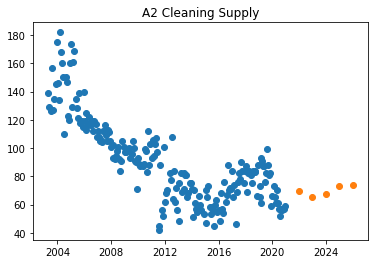

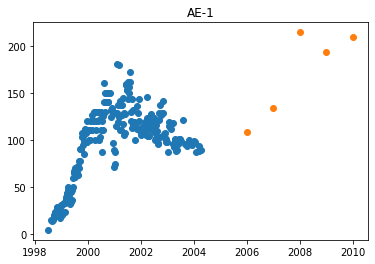

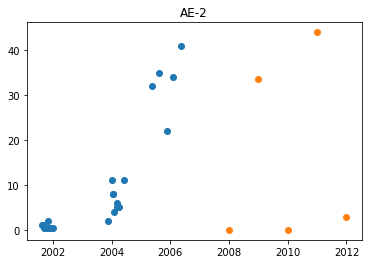

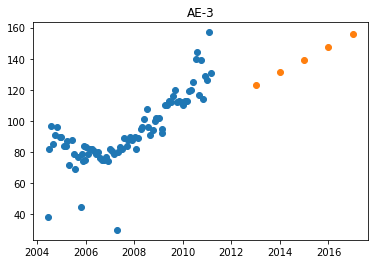

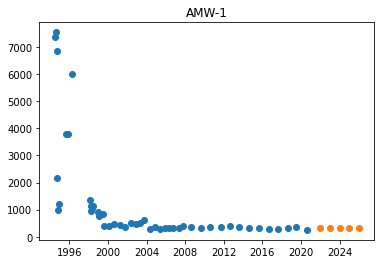

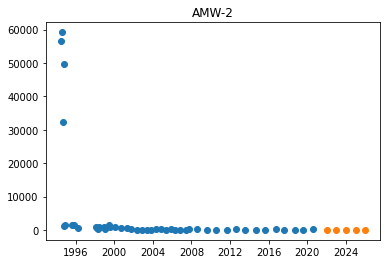

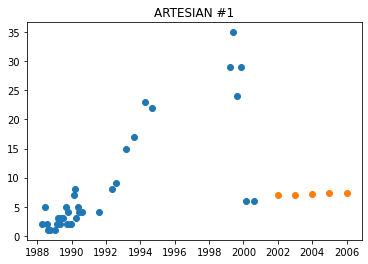

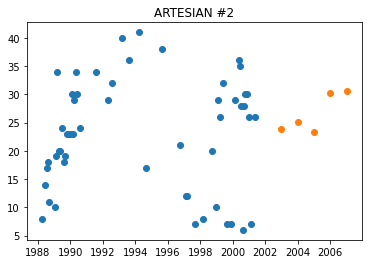

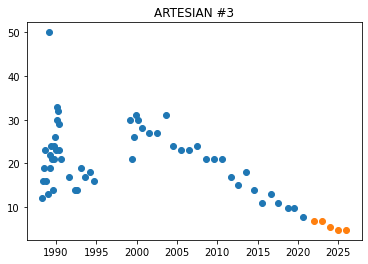

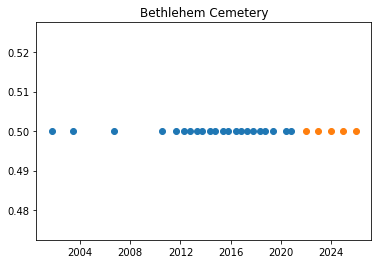

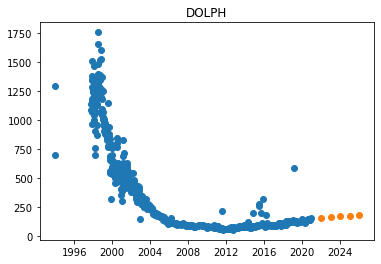

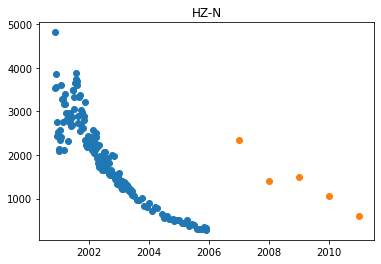

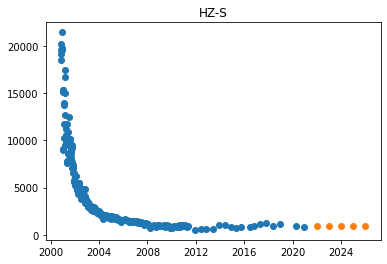

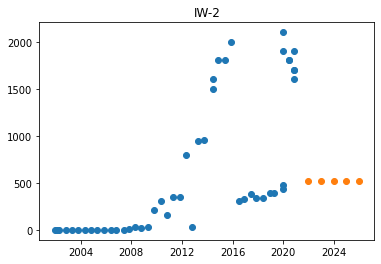

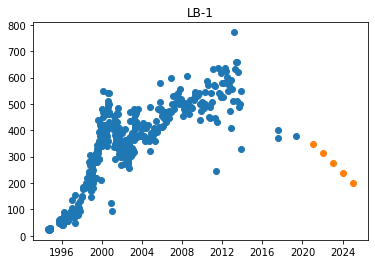

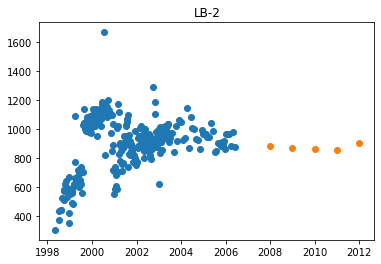

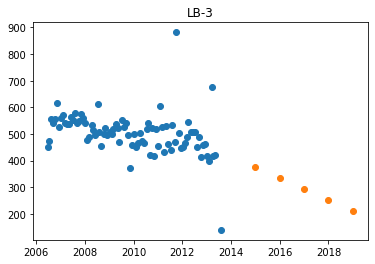

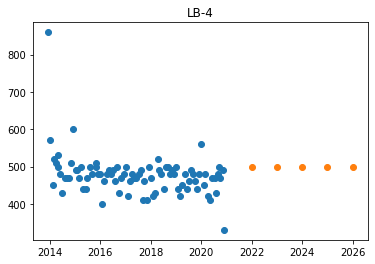

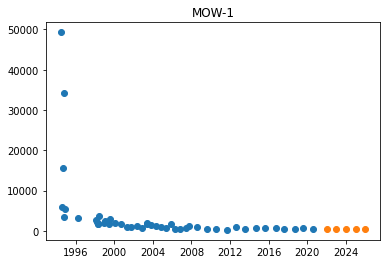

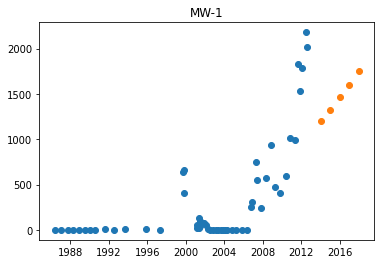

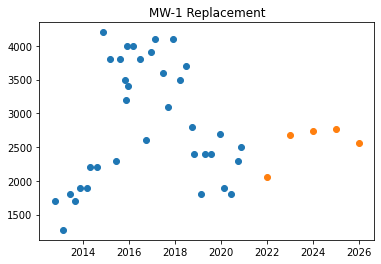

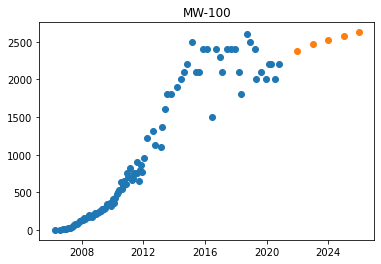

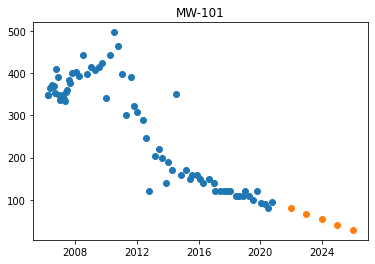

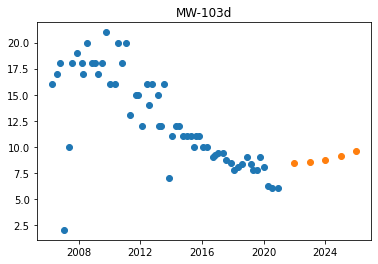

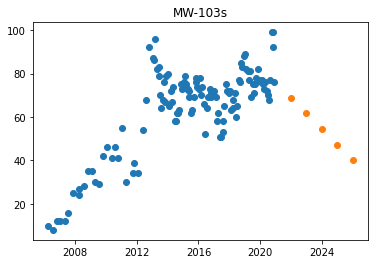

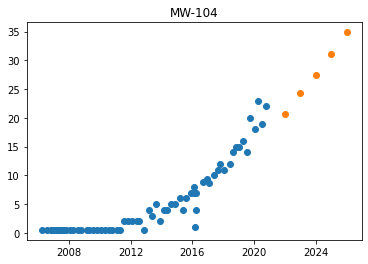

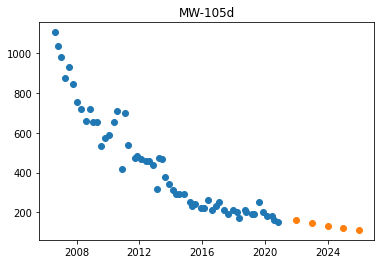

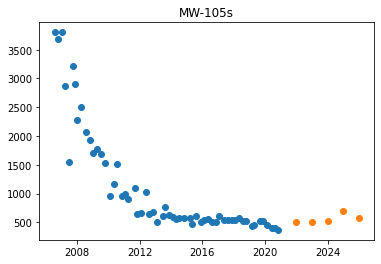

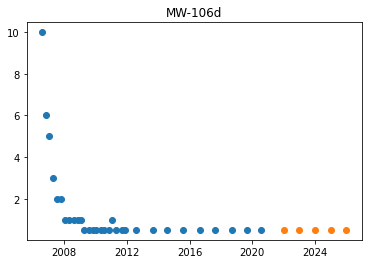

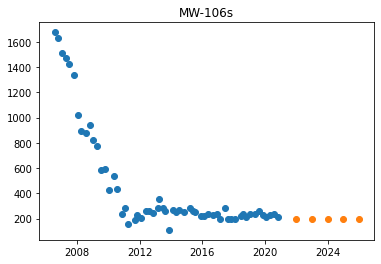

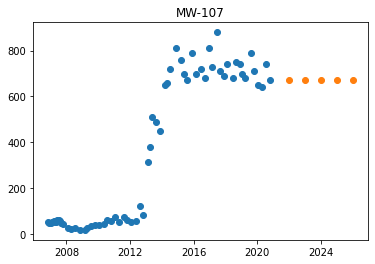

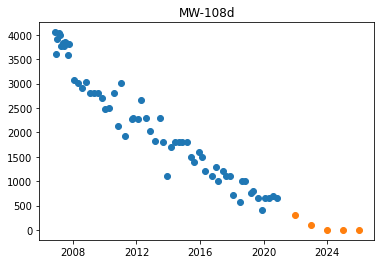

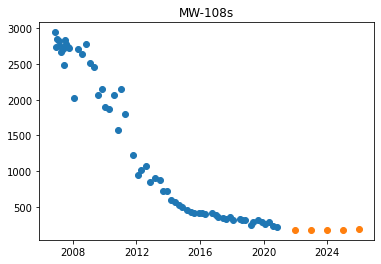

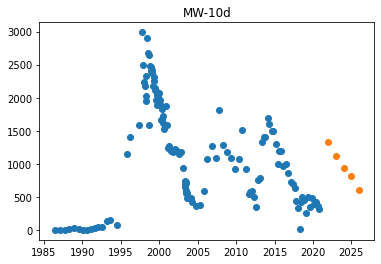

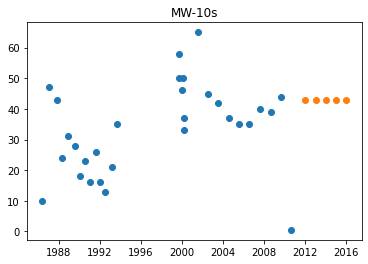

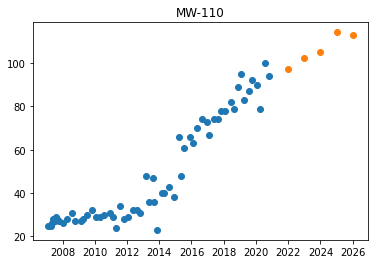

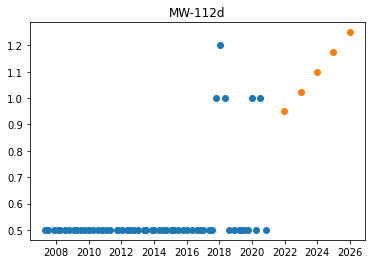

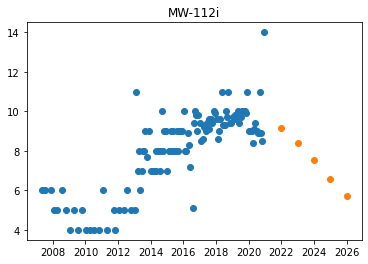

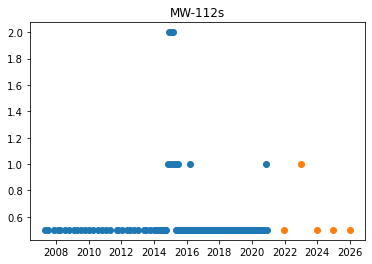

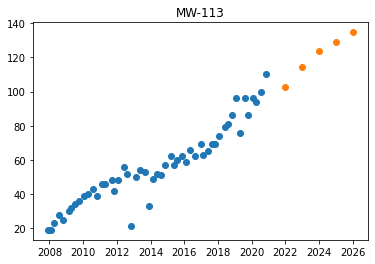

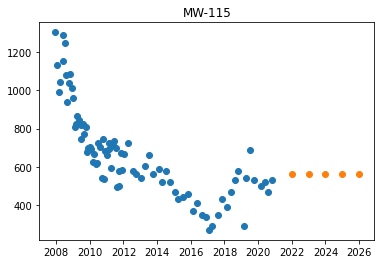

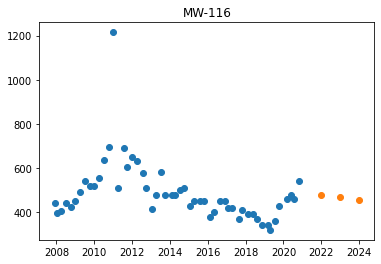

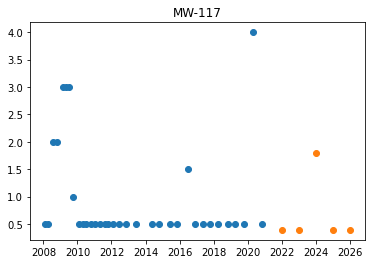

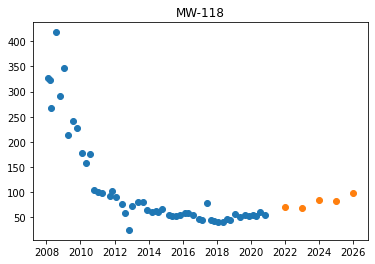

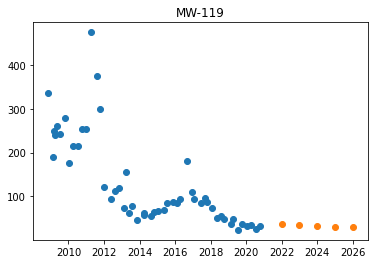

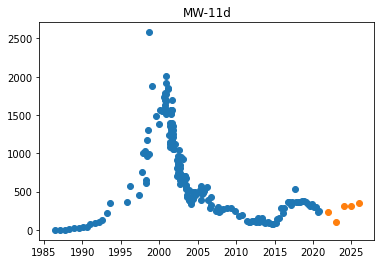

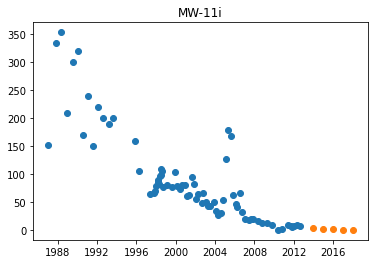

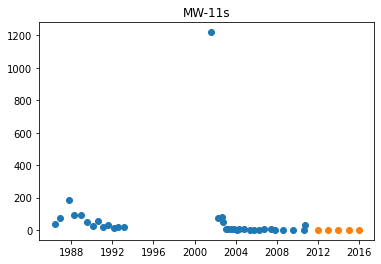

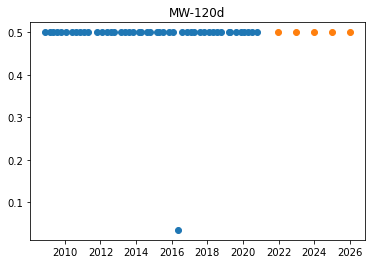

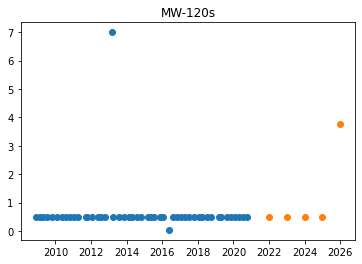

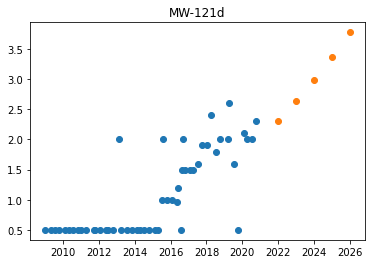

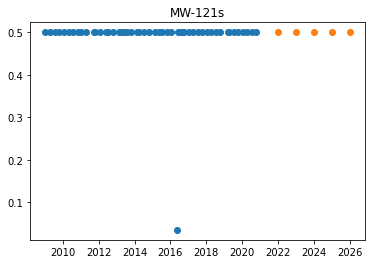

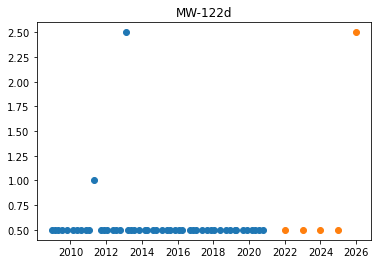

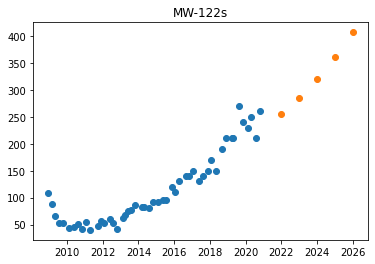

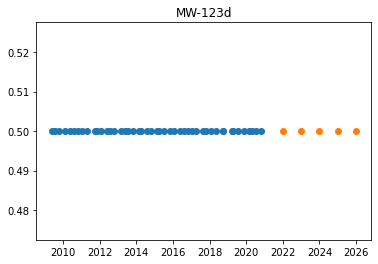

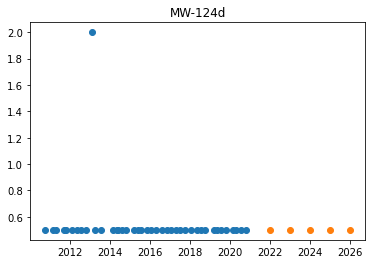

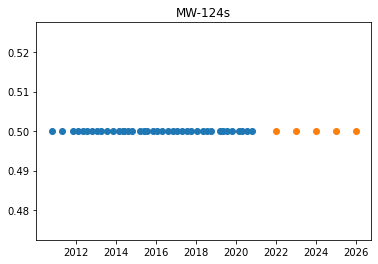

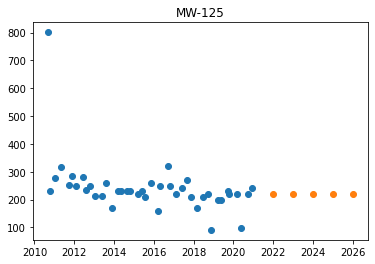

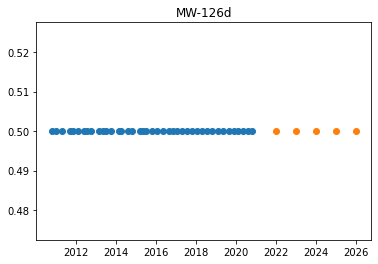

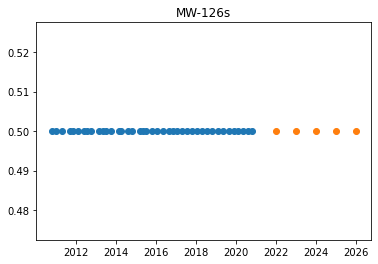

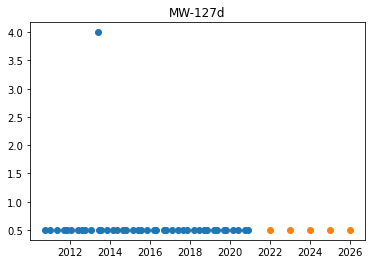

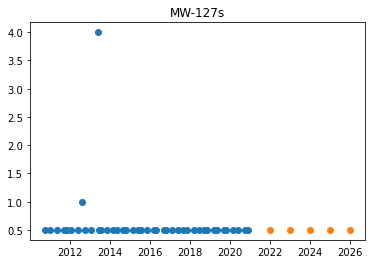

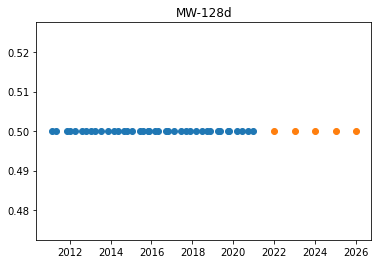

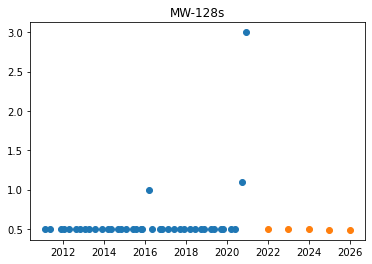

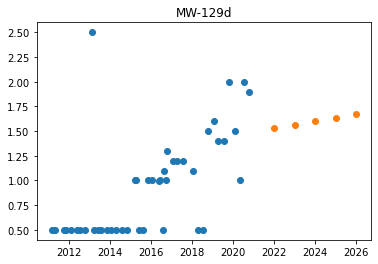

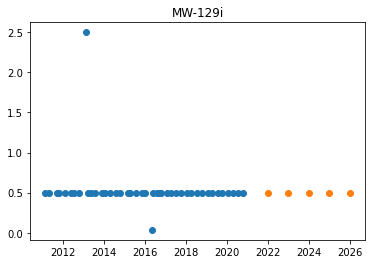

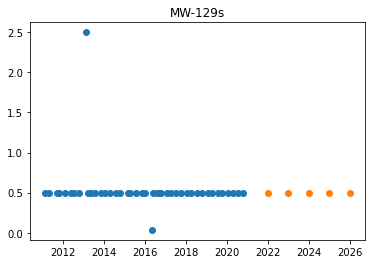

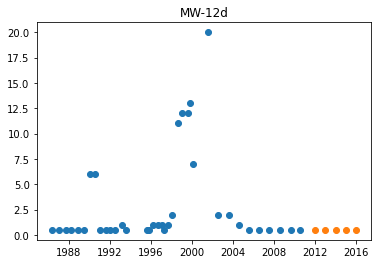

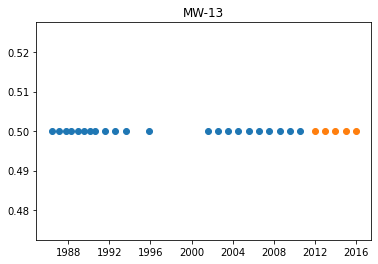

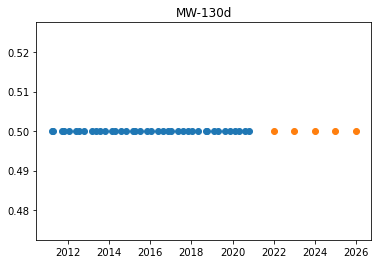

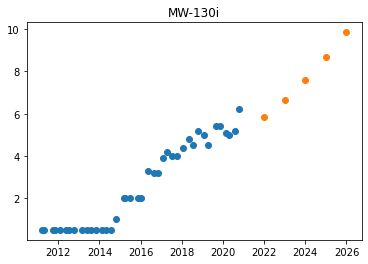

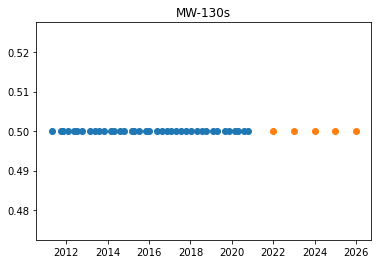

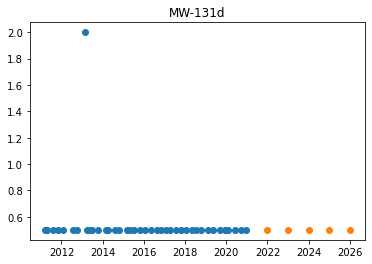

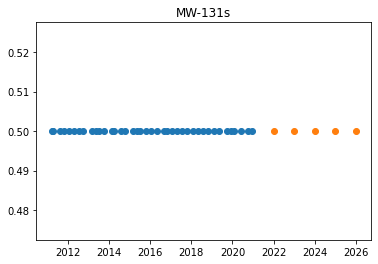

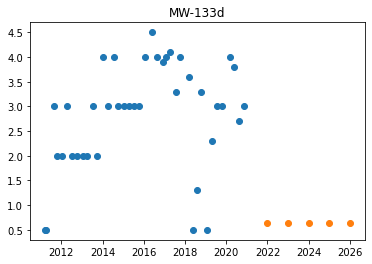

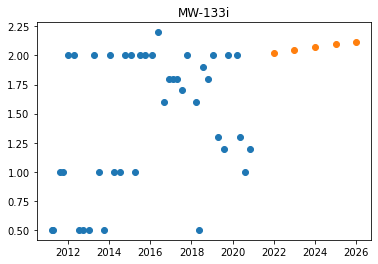

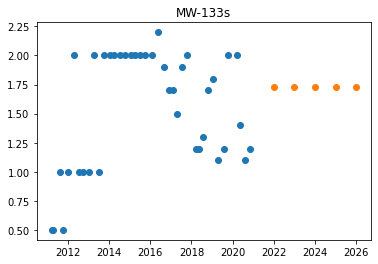

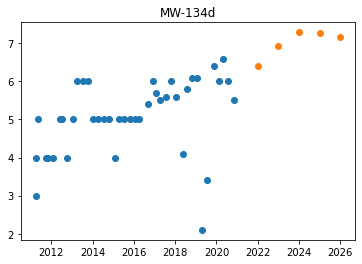

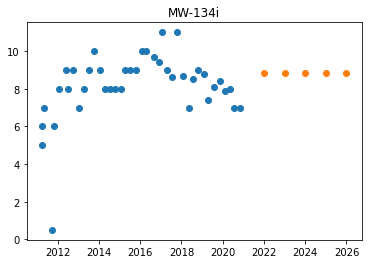

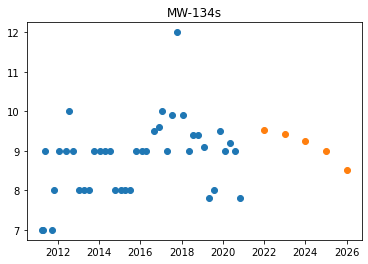

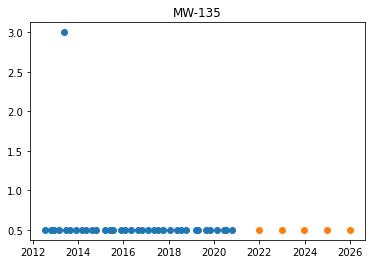

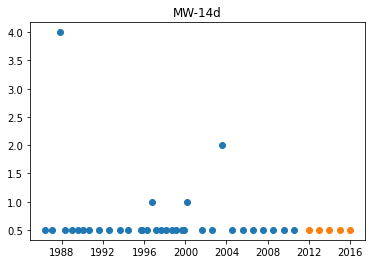

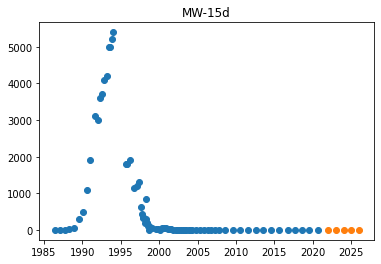

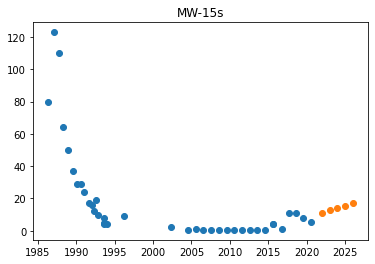

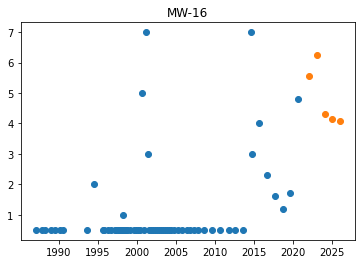

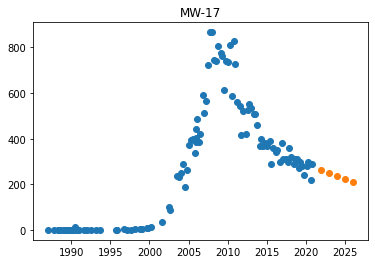

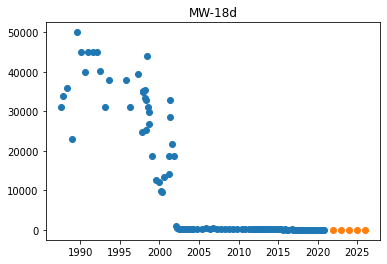

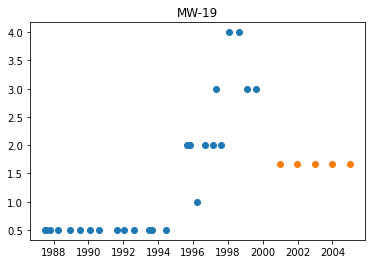

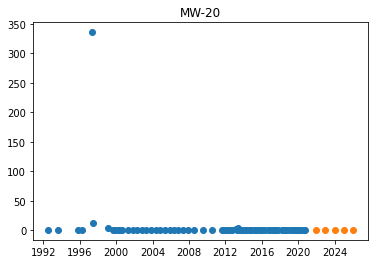

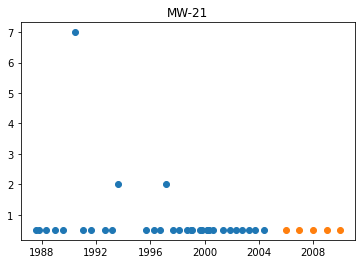

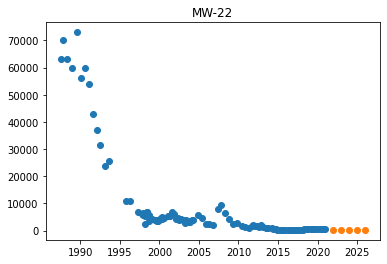

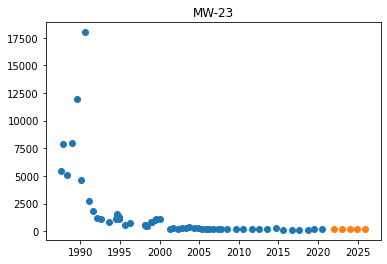

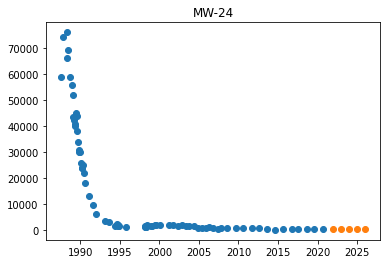

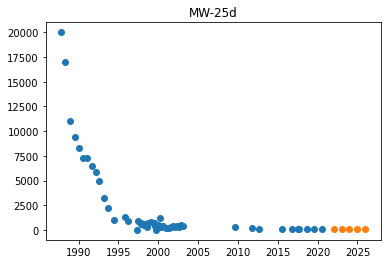

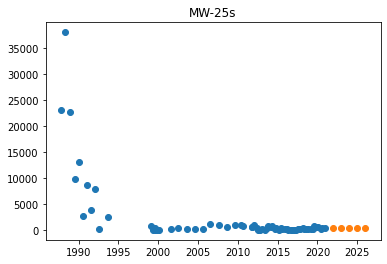

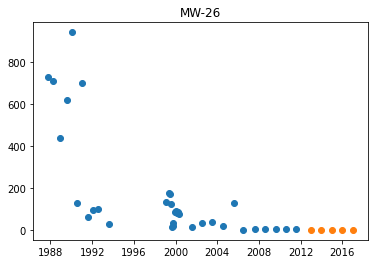

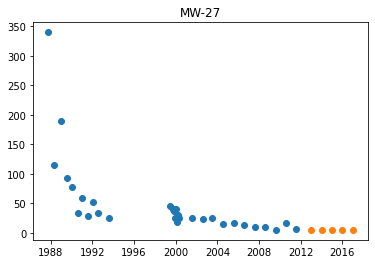

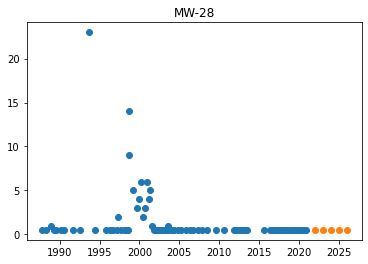

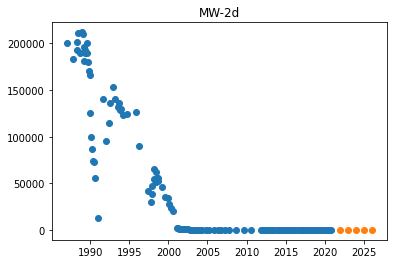

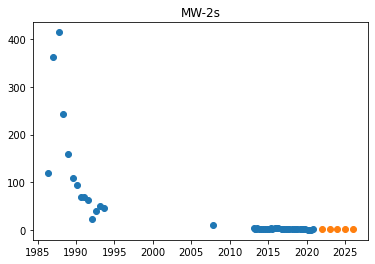

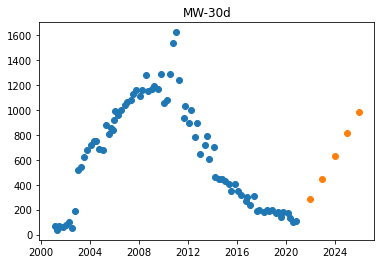

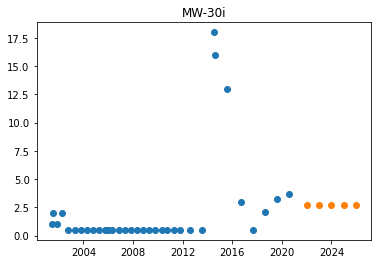

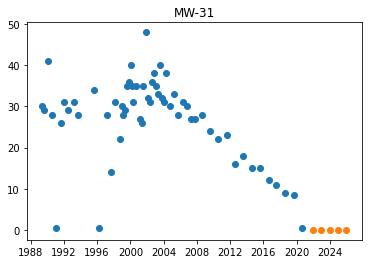

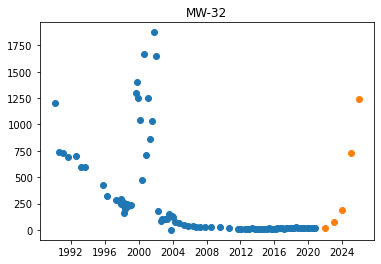

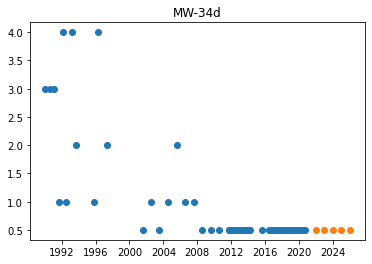

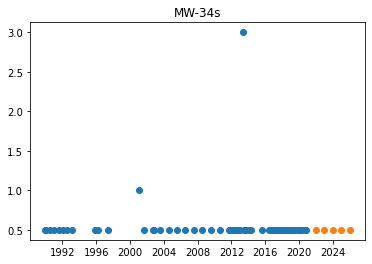

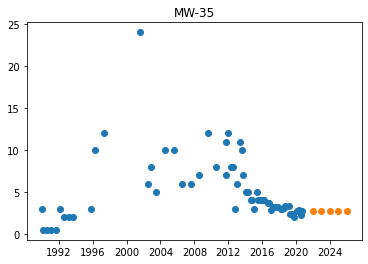

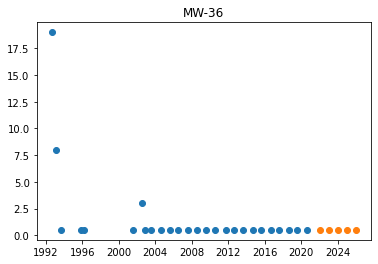

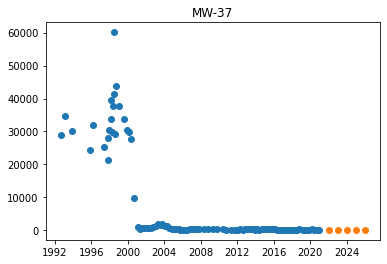

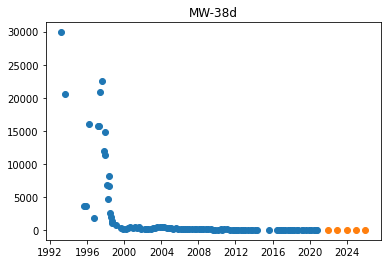

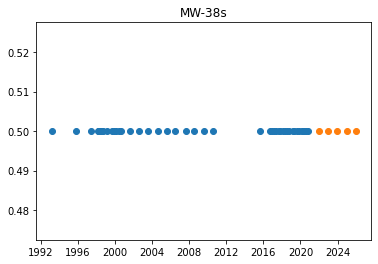

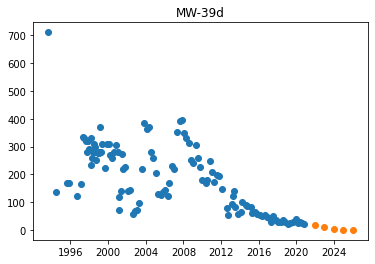

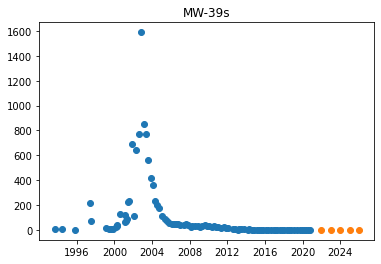

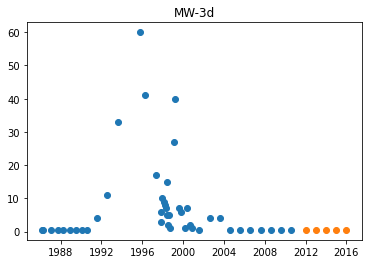

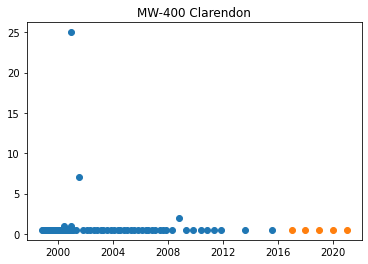

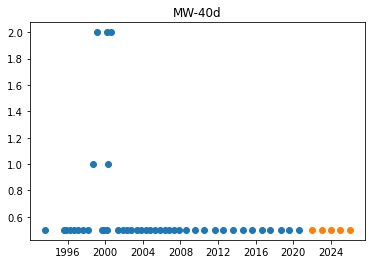

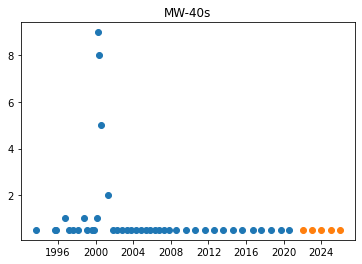

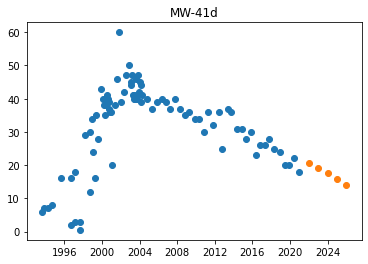

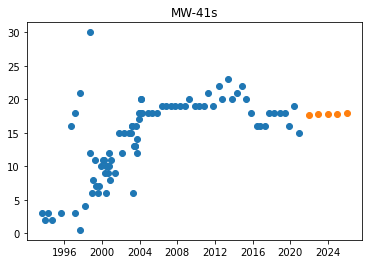

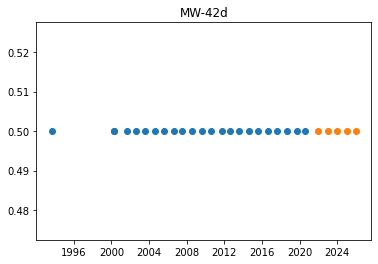

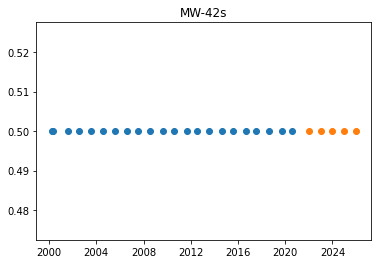

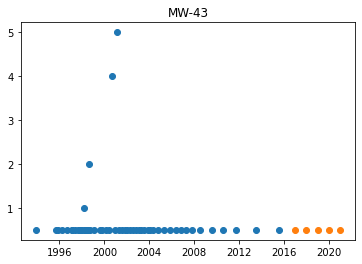

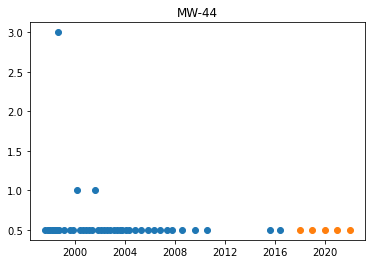

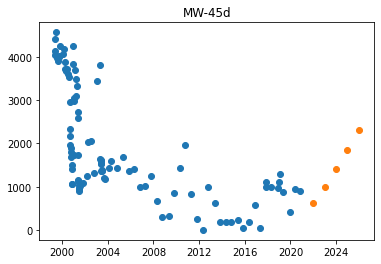

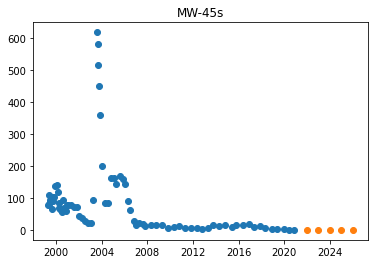

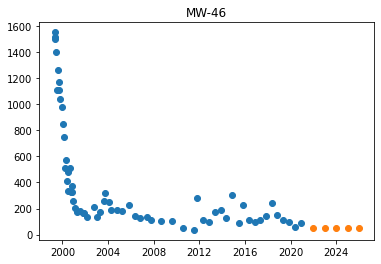

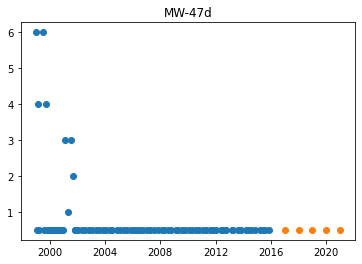

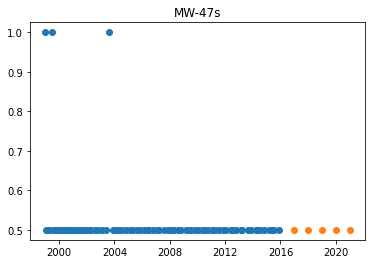

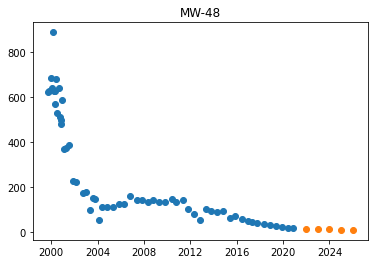

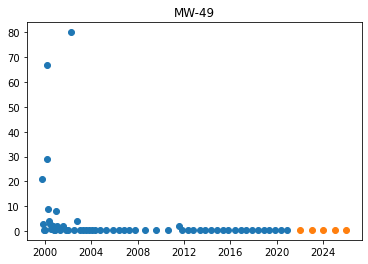

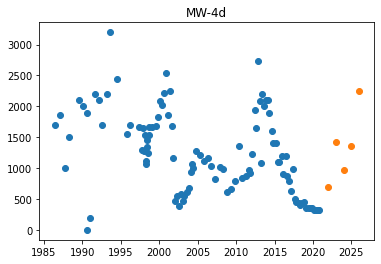

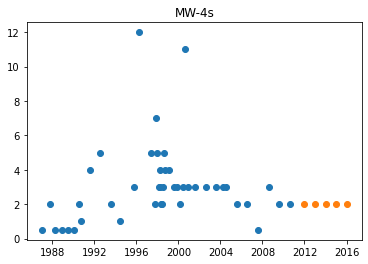

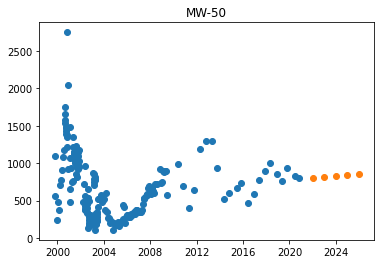

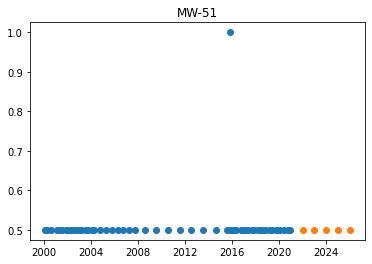

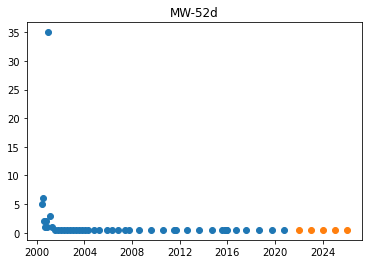

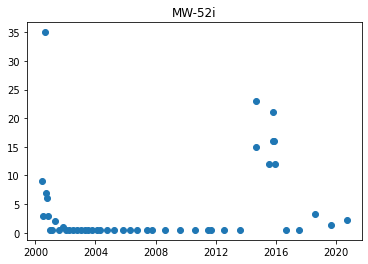

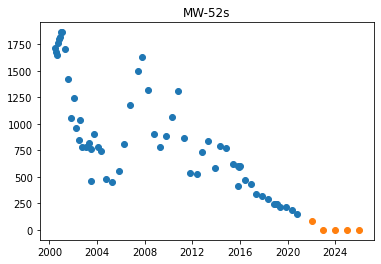

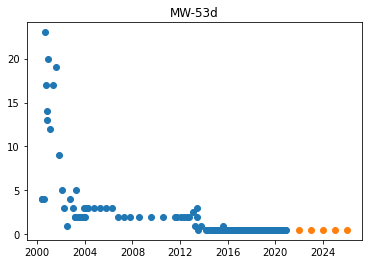

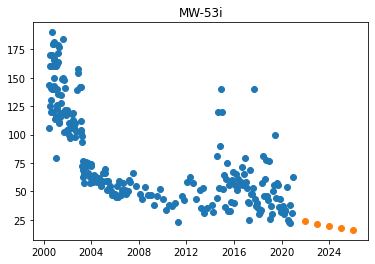

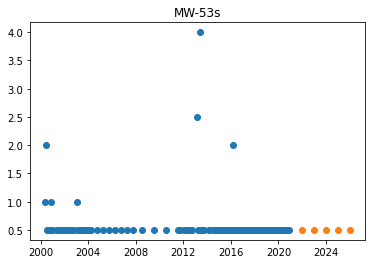

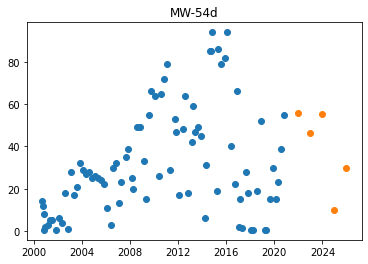

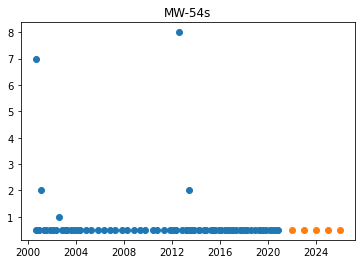

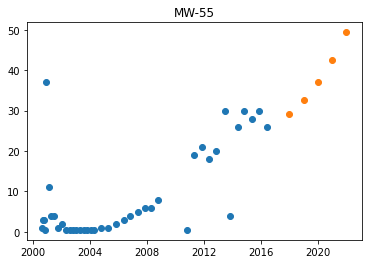

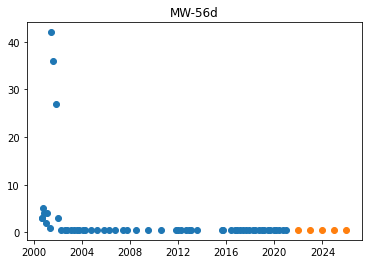

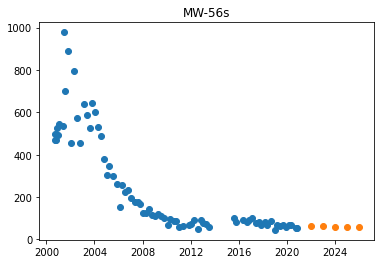

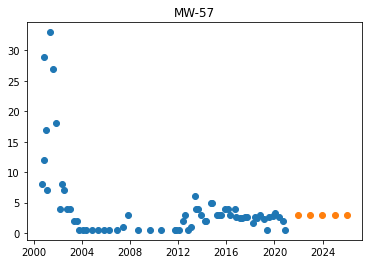

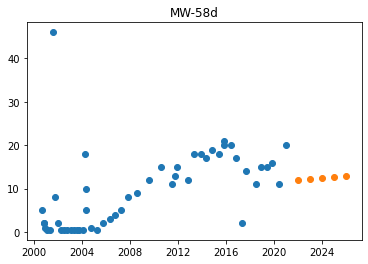

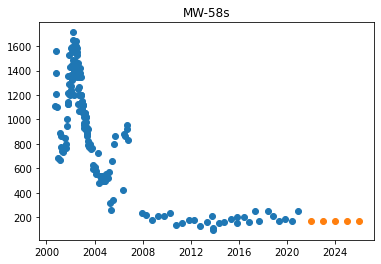

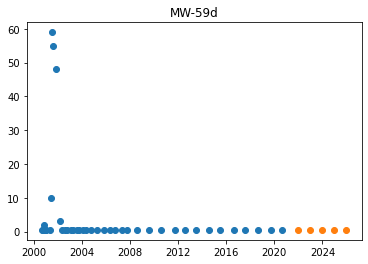

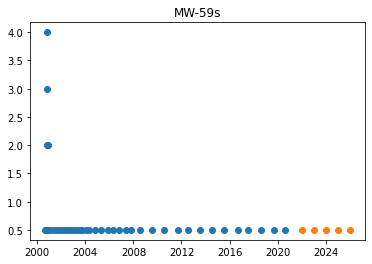

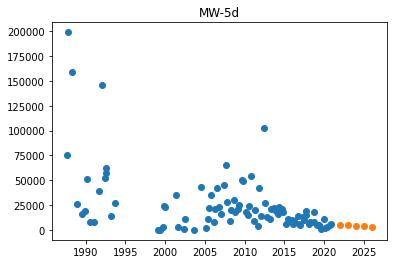

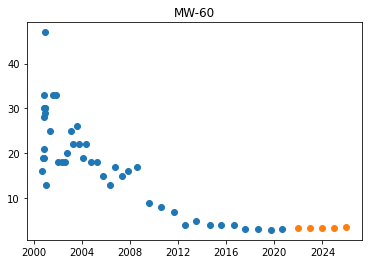

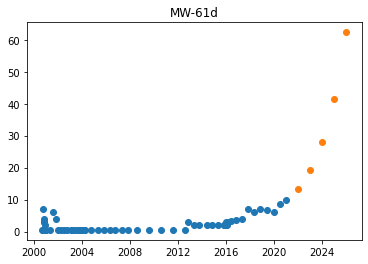

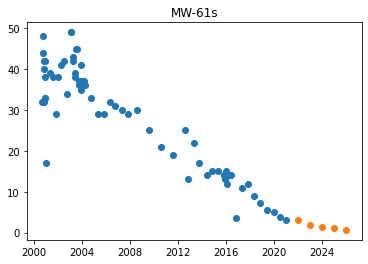

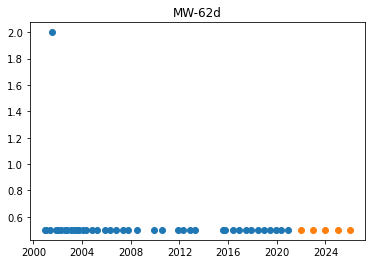

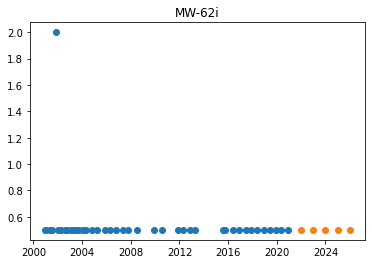

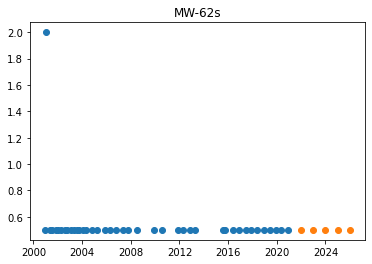

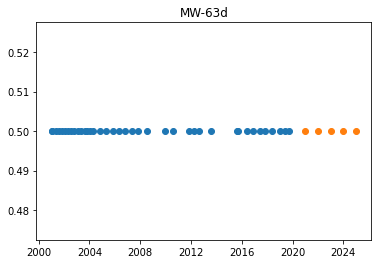

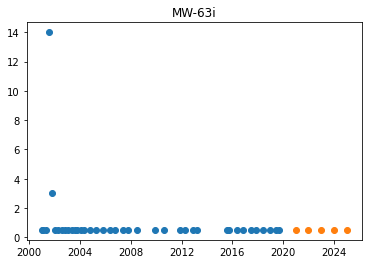

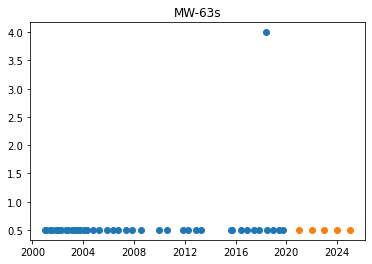

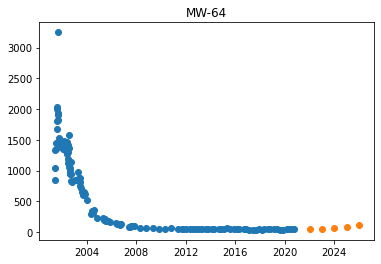

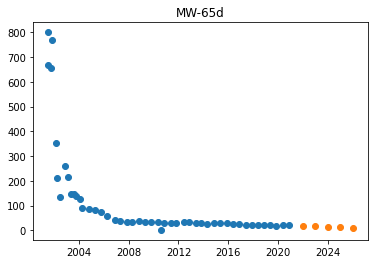

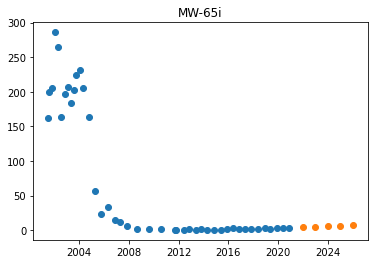

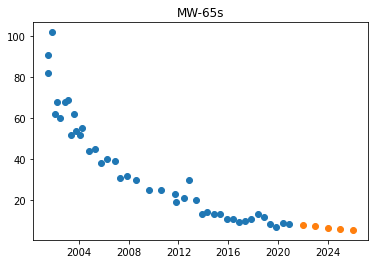

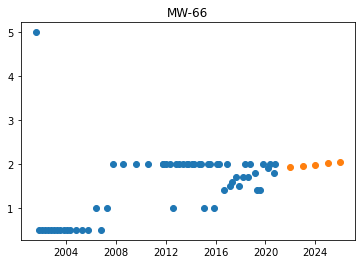

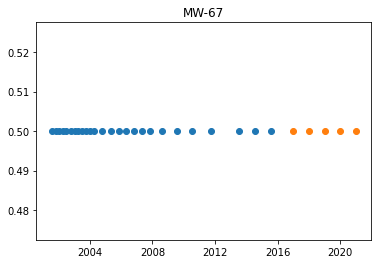

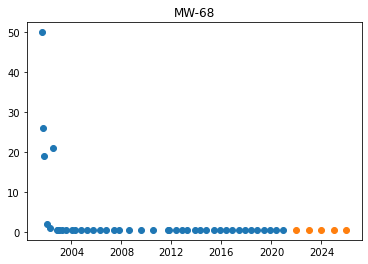

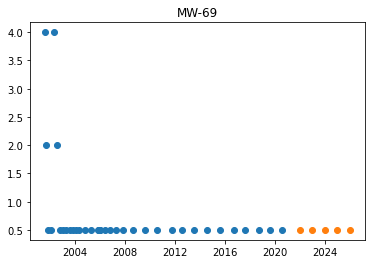

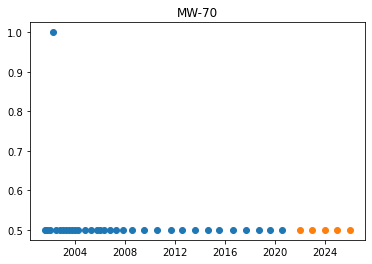

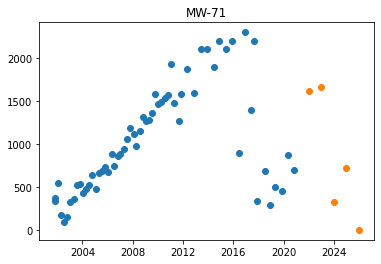

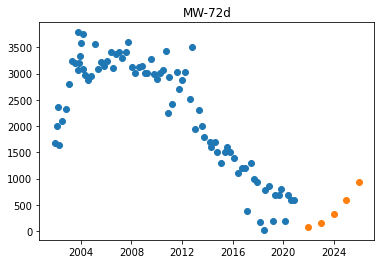

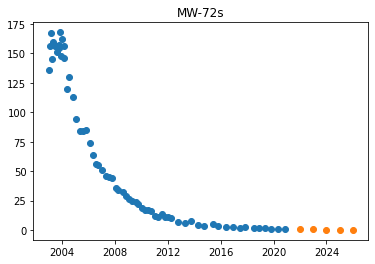

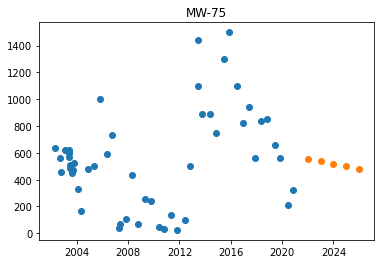

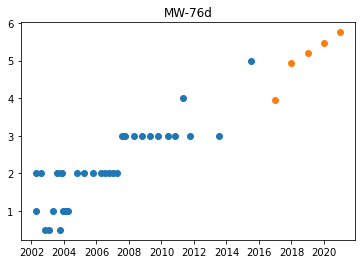

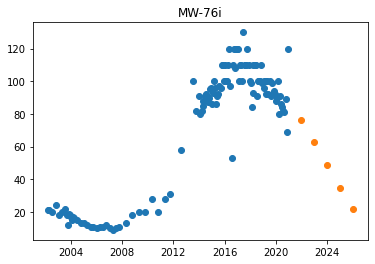

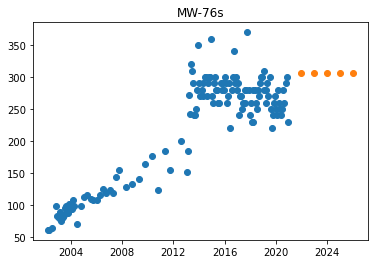

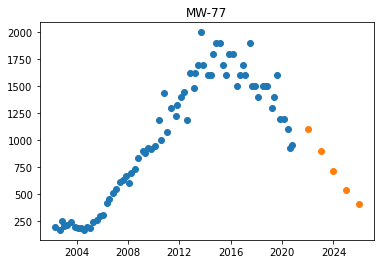

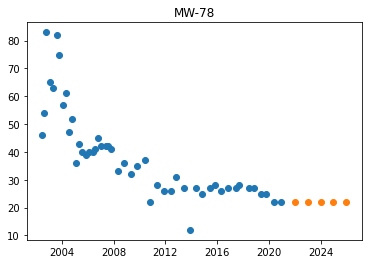

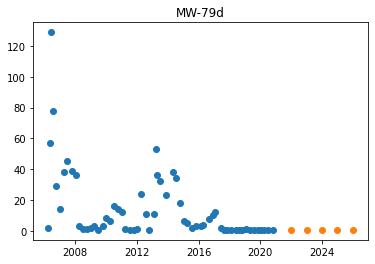

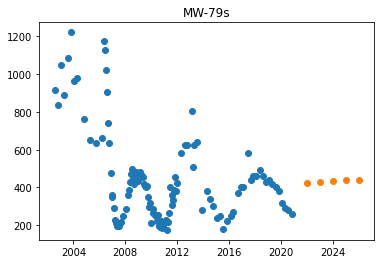

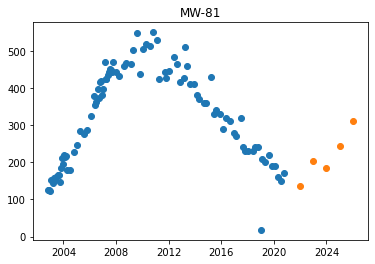

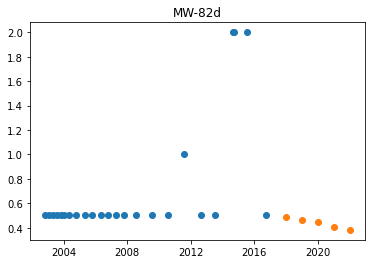

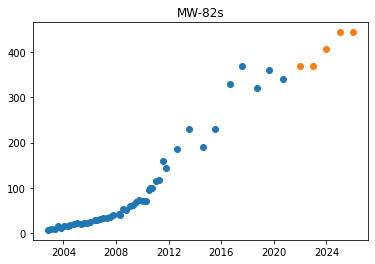

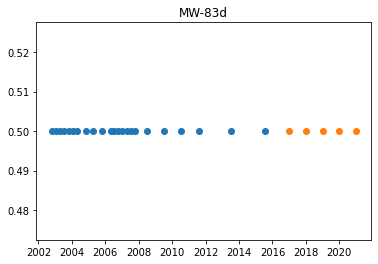

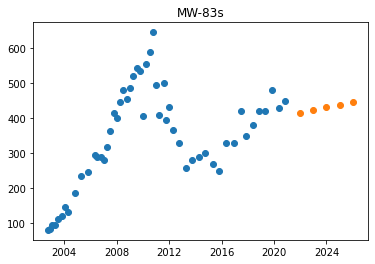

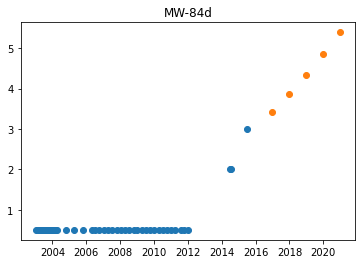

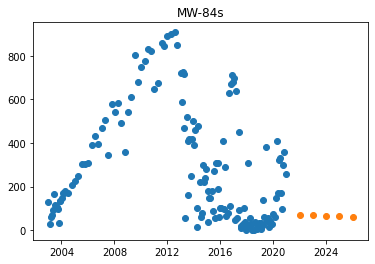

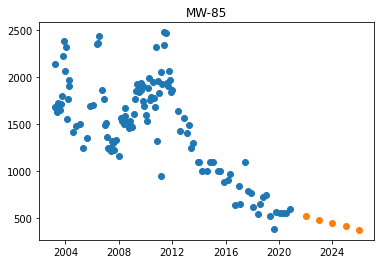

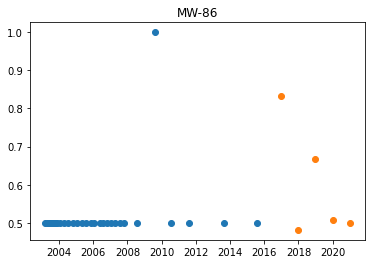

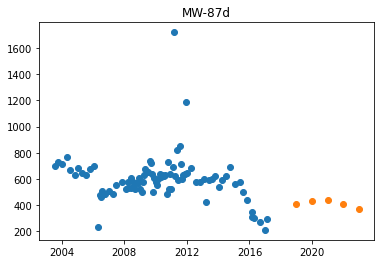

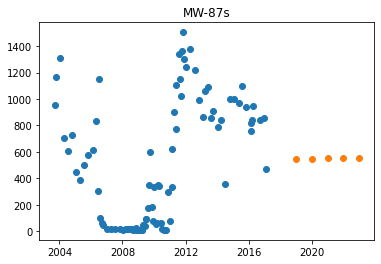

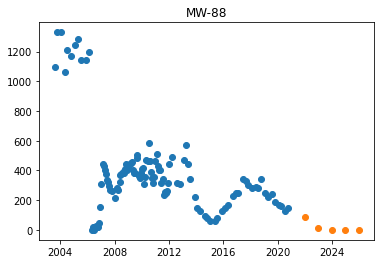

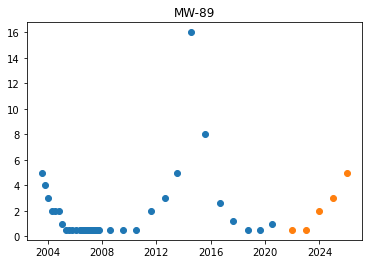

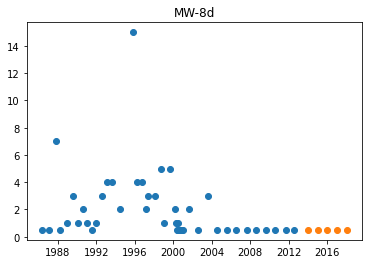

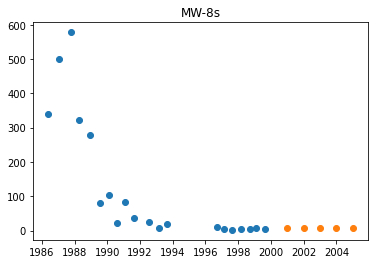

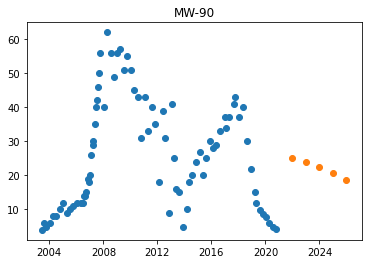

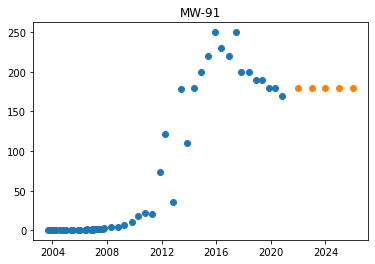

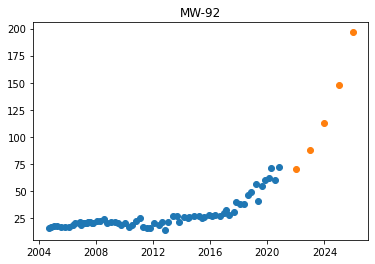

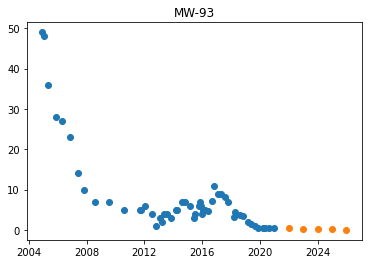

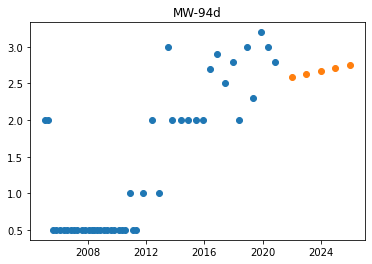

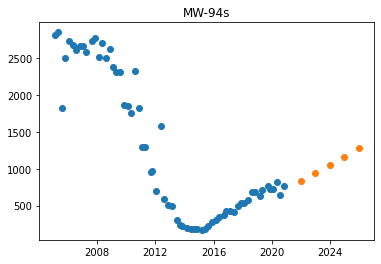

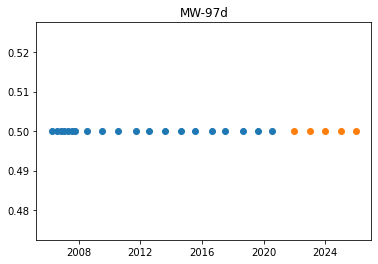

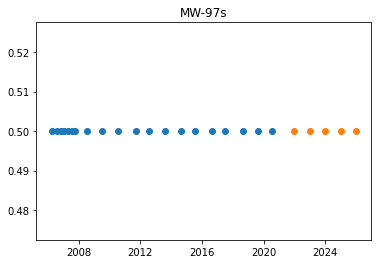

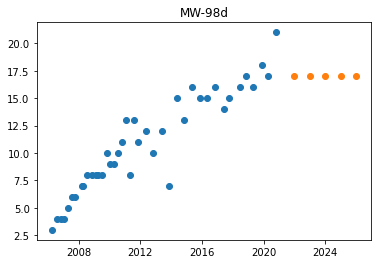

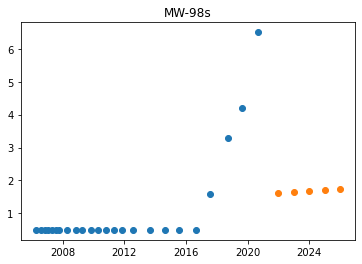

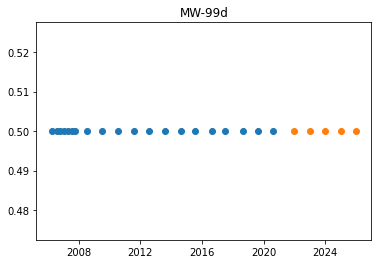

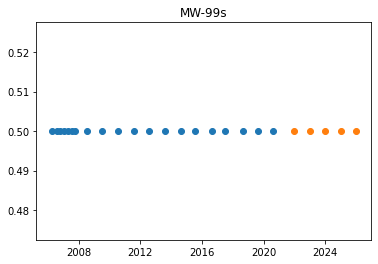

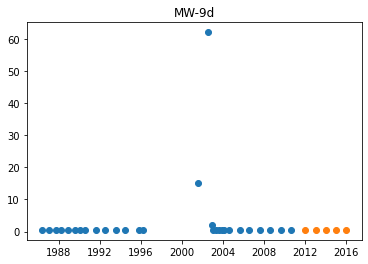

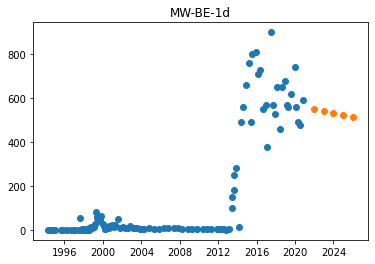

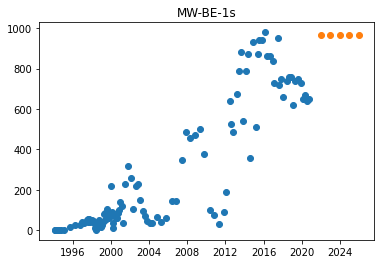

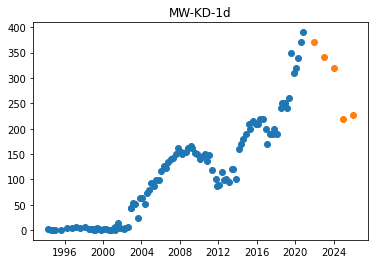

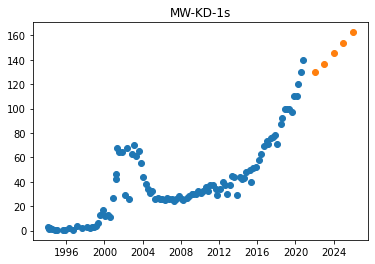

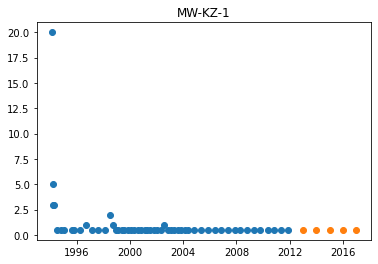

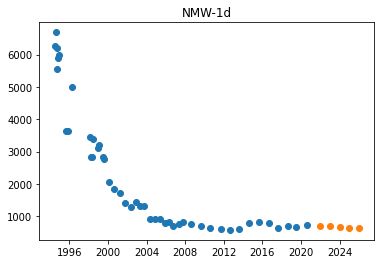

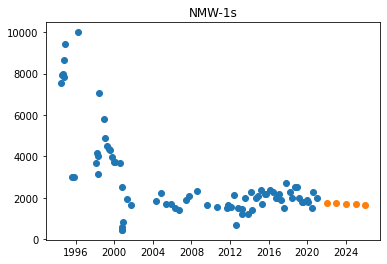

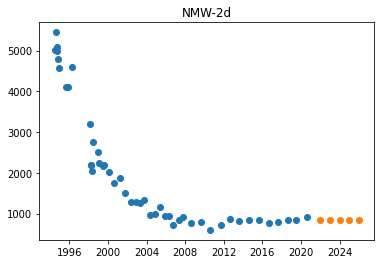

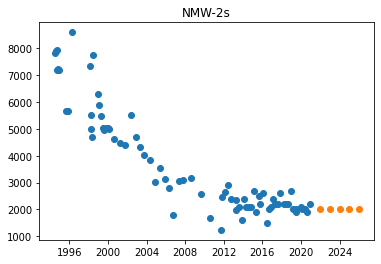

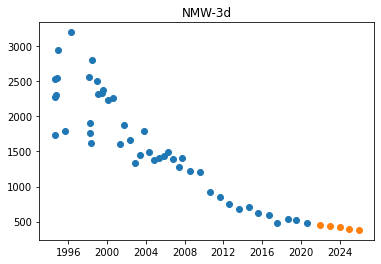

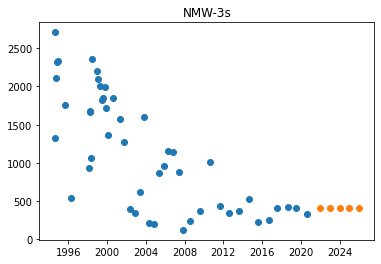

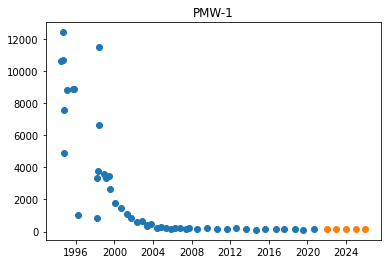

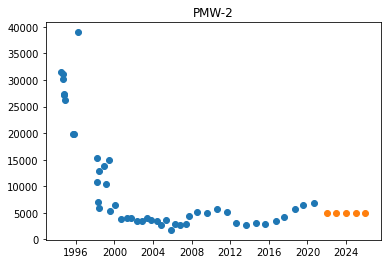

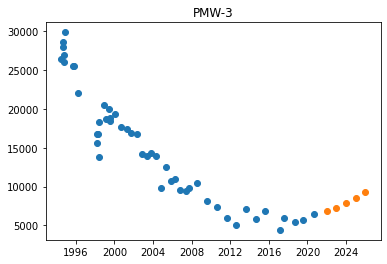

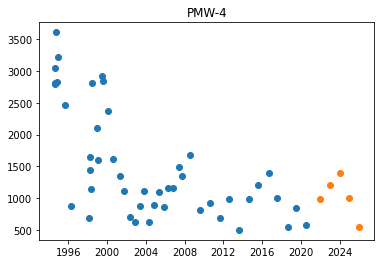

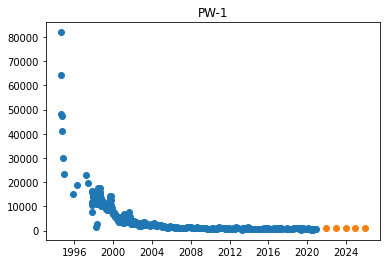

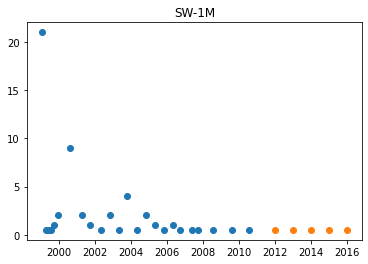

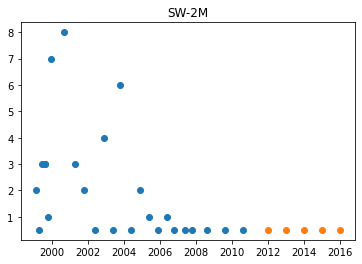

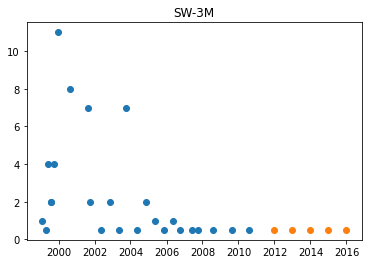

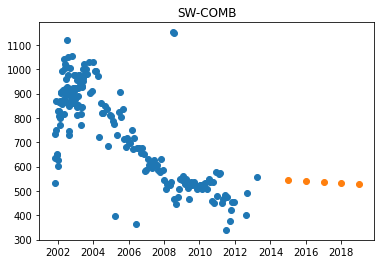

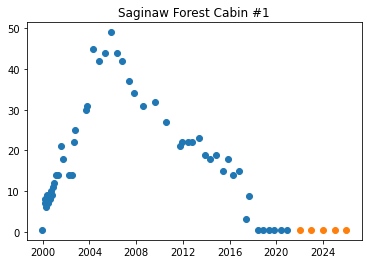

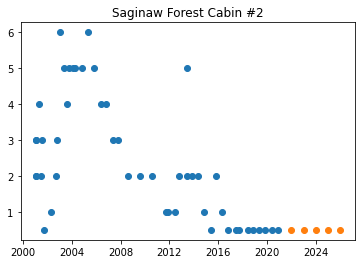

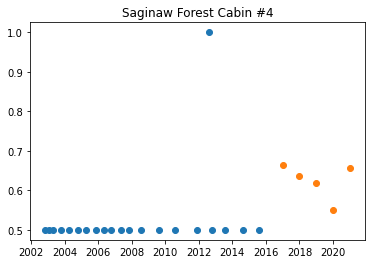

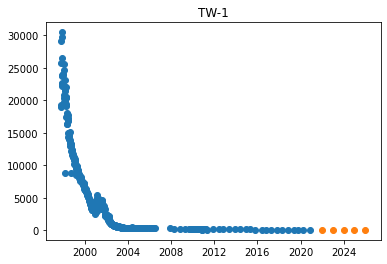

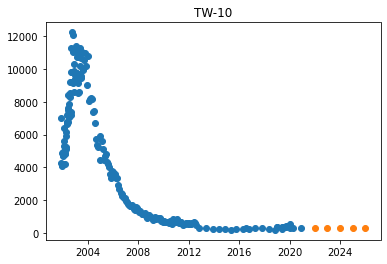

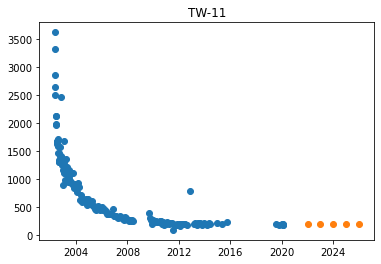

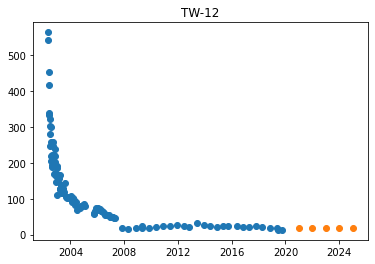

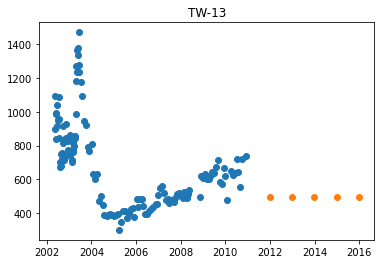

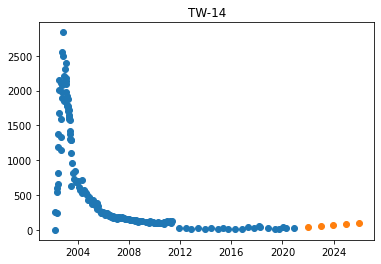

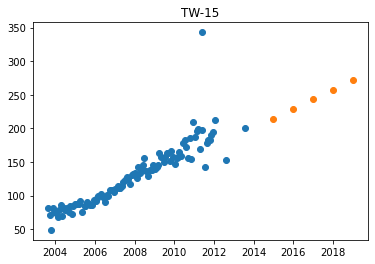

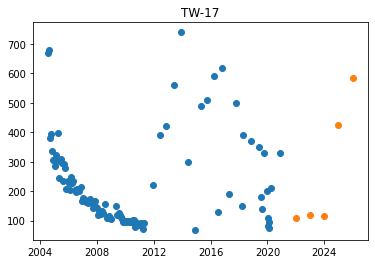

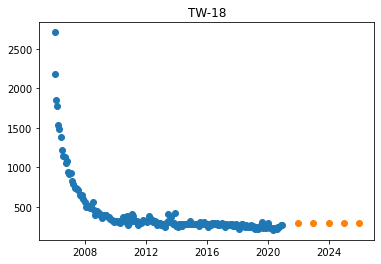

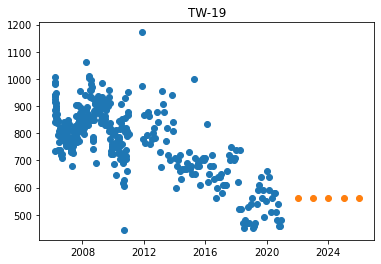

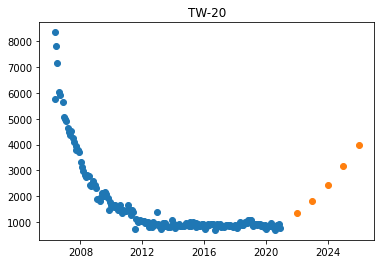

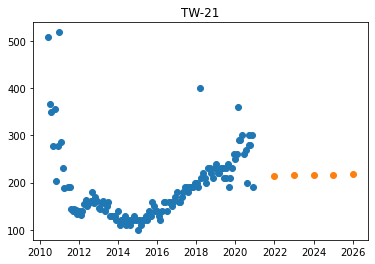

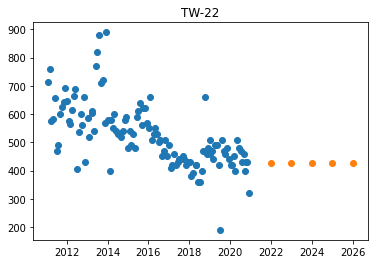

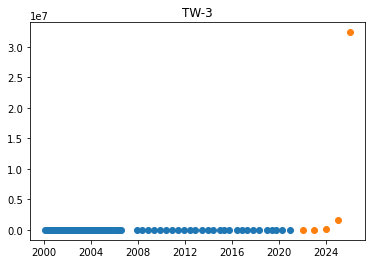

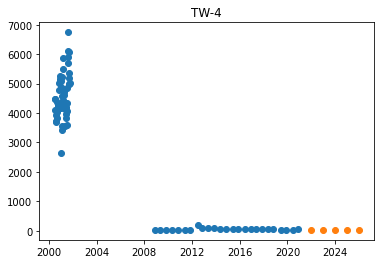

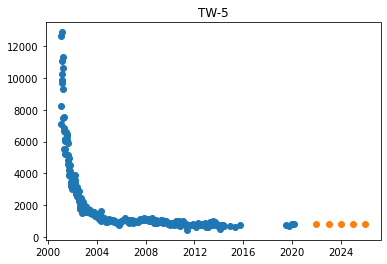

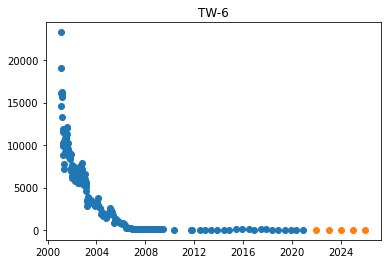

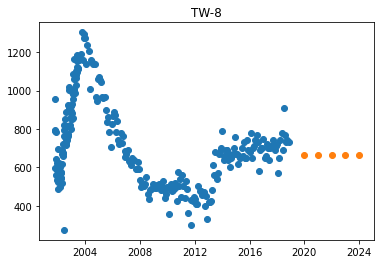

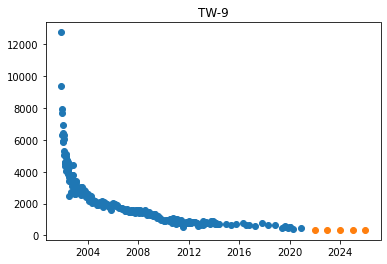

In [9]:
IS_DEBUG = False
grouped = well_data.groupby('Bore')
n_rows = 1
count = 0
model_list = [
    'LastValueNaive',
    'GLS',
    'ETS',
    'AverageValueNaive',
]
all_well_data = []
RES_DIR = "../../result/result(AllInOne)"
for name, group in grouped:
    # if name == "110 Parkland Plaza":
    try:
        if len(group) < 20:
            print('skip'+name,':length is less than 20.')
            continue
        group['Date'] = pd.to_datetime(group['ds'])
        # max_date = group['Date'].max() - datetime.timedelta(days=365*5)
        ori_group = group[:]
        ori_group.set_index('Date', inplace=True)
        # group = group[group['Date']<=max_date]

        group.set_index('Date', inplace=True)

        mod = AutoTS(forecast_length=5,
                     frequency='Y',
                     ensemble='simple',
                     no_negatives=True,
                     min_allowed_train_percent = 0.2,
                     model_list=model_list,
                     verbose=-4)

        mod = mod.fit(group, date_col='ds', value_col='y', id_col=None)
        # print(mod)
        prediction = mod.predict()
        forecast = prediction.forecast
        # model_results = mod.results()
        # validation = mod.results("validation")
        # Forecast
        # print(forecast)

        ft = open(RES_DIR+"/mod/" + name + '.txt', "w")
        ft.write(format_model(str(mod)))
        ft.close()

        fig, ax = plt.subplots()
        # ax.plot(group.y,  label='a')
        # ax.plot(forecast,  label='b')

        ax.scatter(ori_group.y.index, ori_group.y, label = 'a')
        ax.scatter(forecast.index, forecast, label = 'b')

        ax.set_title(name)
        plt.savefig(RES_DIR+"/fig/"+name+'.png')

        cache_dir = pathlib.Path(RES_DIR+'/cache/'+name)
        cache_dir.mkdir(parents=True, exist_ok=True)


        group.y.to_csv(cache_dir.joinpath('data.csv'))
        forecast.index.name = "Date"
        forecast.squeeze().to_csv(cache_dir.joinpath('predict.csv'))


        all_well_data.append((name, group.y, forecast, mod))
        count+=1
    except KeyboardInterrupt:
        break

    except:
        print("[predict error]", name)
        count+=1
        continue

### 🔹 Generate summary

In [16]:
import pathlib
import os
f = open(RES_DIR+"/summary.md", "w")
FIG_CC_DIR = pathlib.Path(RES_DIR+'/fig/')
f.write("# Summary\n")
name_list = [name for name in os.listdir(RES_DIR+"/cache/")]
print(name_list)
for i in name_list:
    f.write("## "+i+"\n")
    f.write('\n')
    f.write('![](./fig/'+str(i).replace(' ', '_')+'.png)\n')
    mod_path = RES_DIR+'/mod/'+str(i)+'.txt'

    if os.path.isfile(mod_path):
        mod_list = open(mod_path, 'r').read()
        f.write('\n' + str(format_model(mod_list)) + '\n')
    rlist_path = RES_DIR+'/radius/'+str(i)+'.txt'
    if os.path.isfile(rlist_path):
        rad_list = open(rlist_path, 'r').read()
        f.write('\n' + str(rad_list) + '\n')
f.close()

['MW-112d', 'MW-61d', 'MW-42s', 'SW-1M', '593 Allison', 'AMW-1', 'MW-84s', 'MW-131s', 'MW-82d', '2950 Valley', 'MW-BE-1s', 'MW-62d', '2652 Dexter Rd', 'MW-87s', 'MW-134d', 'IW-2', 'MW-41s', 'SW-2M', '4470 Jackson Rd', 'MW-47d', 'MW-107', 'TW-4', 'MW-53i', 'TW-3', '4141 Jackson Rd', 'MW-100', 'SW-COMB', 'MW-9d', 'MW-106s', 'MW-129s', 'MW-15d', 'MW-KZ-1', 'MW-76i', 'MW-60', 'MW-56d', 'Bethlehem Cemetery', 'TW-13', 'MW-67', 'MW-93', 'PMW-1', 'TW-14', 'MOW-1', '430 Barber West', 'MW-51', 'MW-3d', '2690 Dexter Rd', 'TW-22', 'AE-1', 'MW-30d', '3249 Dexter Rd', '697 South Wagner Rd', 'MW-79d', 'MW-69', '435 Barber', 'MW-59s', 'MW-35', 'MW-10s', 'MW-105s', 'DOLPH', 'NMW-3d', 'MW-39d', 'MW-32', 'MW-103d', 'MW-101', '440 Clarendon', '110 Parkland Plaza', 'TW-5', 'MW-99d', 'MW-76s', 'MW-57', 'MW-120s', 'MW-68', 'MW-129i', 'MW-50', 'MW-92', 'MW-66', 'MW-126d', 'TW-15', 'MW-53s', 'TW-12', 'MW-88', 'MW-43', 'MW-72s', 'NMW-1s', 'MW-12d', 'MW-8s', 'ARTESIAN #3', 'MW-44', 'MW-128d', 'MW-86', 'LB-2', 'M

In [11]:
import os

dirname = RES_DIR + '/fig/'
for f in os.listdir(dirname):
    f_new = f.replace('#1', '_1').replace('#2', '_2').replace('#3', '_3').replace(' ', '_')
    print(f_new)
    os.rename(os.path.join(dirname, f),os.path.join(dirname, f_new))




4742_Park_Rd.png
TW-13.png
544_Allison.png
MW-35.png
MW-21.png
MW-105s.png
MW-105d.png
597_Allison.png
MW-14d.png
4141_Jackson_Rd.png
MW-20.png
MW-129d.png
MW-129s.png
MW-38d.png
MW-38s.png
PMW-4.png
TW-12.png
MW-79d.png
MW-79s.png
MW-1.png
MW-76i.png
MW-130i.png
MW-59s.png
TW-10.png
MW-59d.png
MW-2d.png
MW-22.png
MW-2s.png
MW-36.png
MW-18d.png
MW-63d.png
MW-63s.png
MW-37.png
MW-23.png
MW-34d.png
MW-34s.png
MW-133d.png
MW-133s.png
TW-11.png
3563_ELIZABETH_RD.png
TW-15.png
MW-124d.png
MW-124s.png
PMW-3.png
MW-27.png
MW-62d.png
MW-62s.png
MW-108s.png
MW-108d.png
MW-3d.png
456_Clarendon.png
MW-32.png
MW-26.png
PMW-2.png
373_Pinewood_Deep.png
MW-58s.png
TW-14.png
MW-58d.png
MOW-1.png
MW-97s.png
MW-97d.png
170_Aprill.png
MW-39d.png
MW-BE-1d.png
MW-39s.png
MW-BE-1s.png
3249_Dexter_Rd.png
MW-128d.png
MW-24.png
MW-128s.png
354_Pinewood.png
MW-15s.png
MW-15d.png
MW-42s.png
MW-19.png
MW-42d.png
MW-31.png
PMW-1.png
2678_Valley.png
MW-54s.png
MW-54d.png
TW-17.png
MW-112s.png
MW-112d.png
MW-81.png
